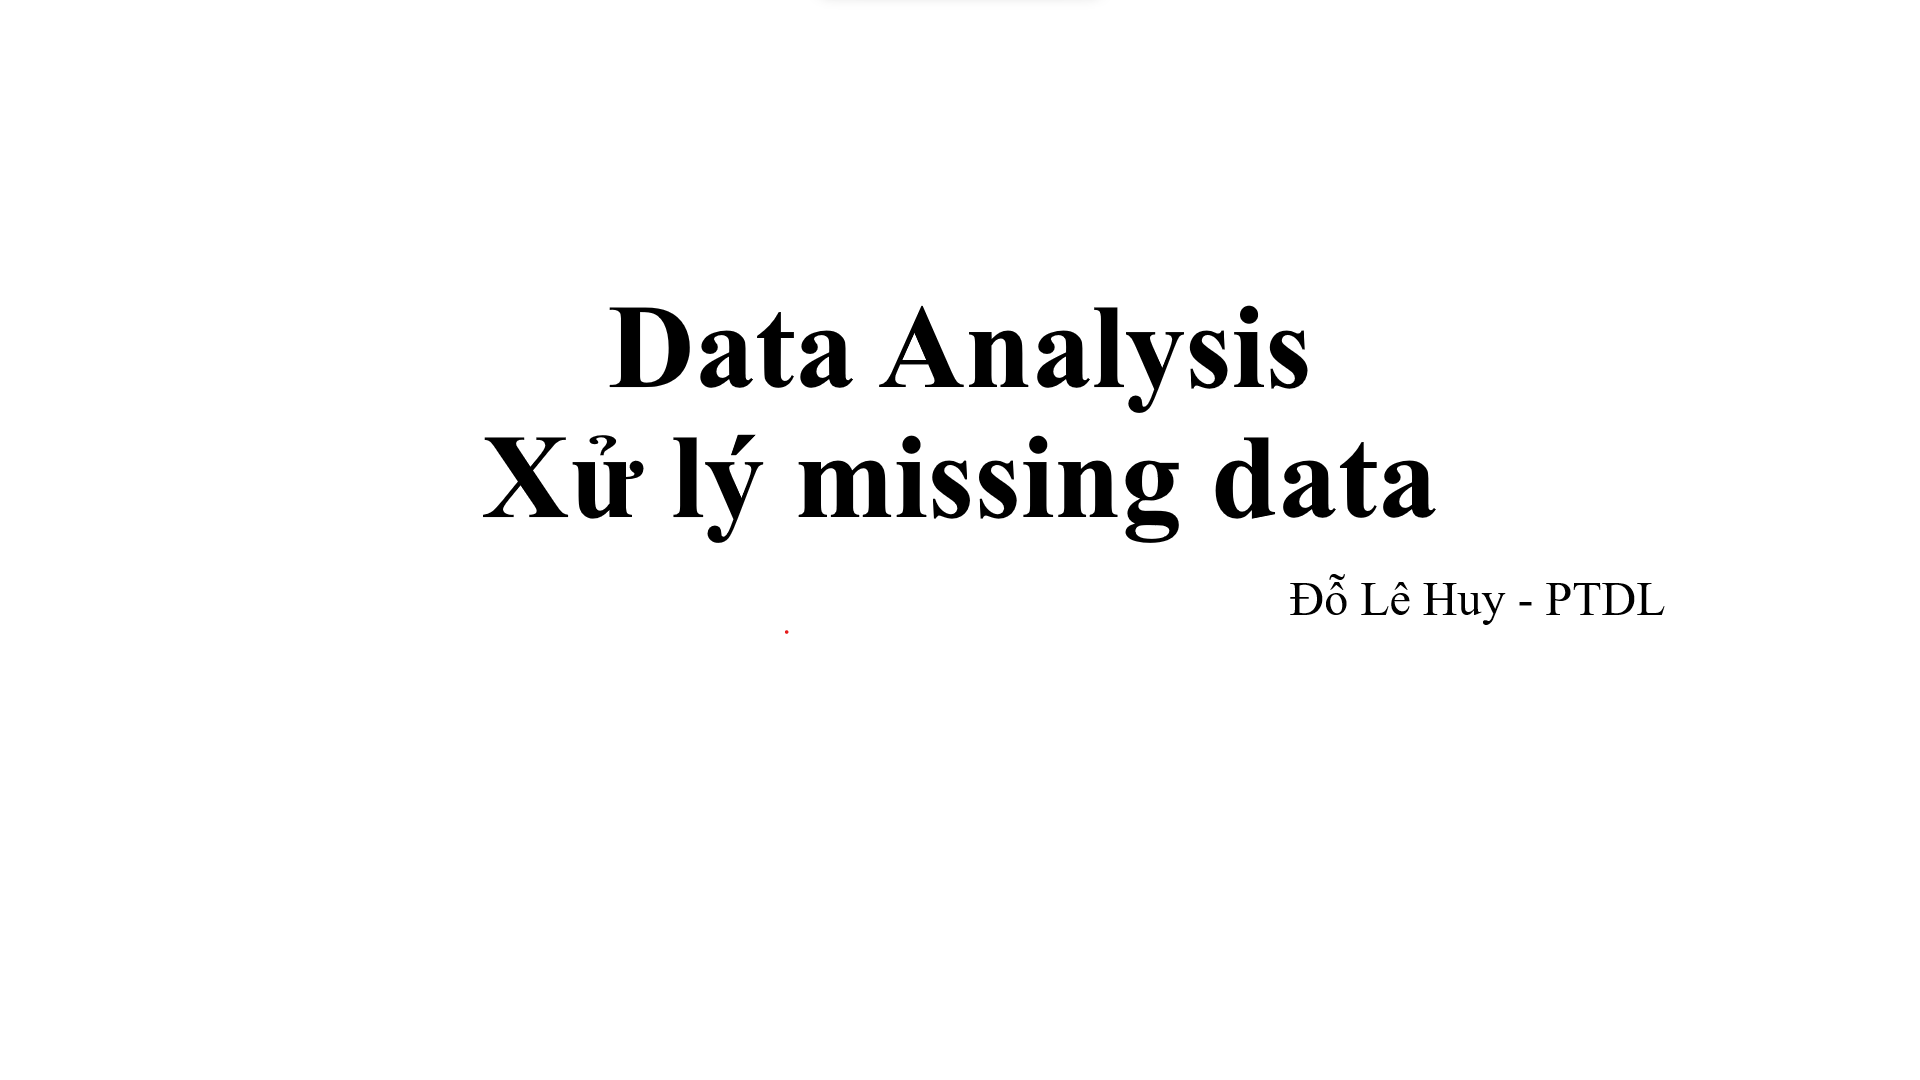


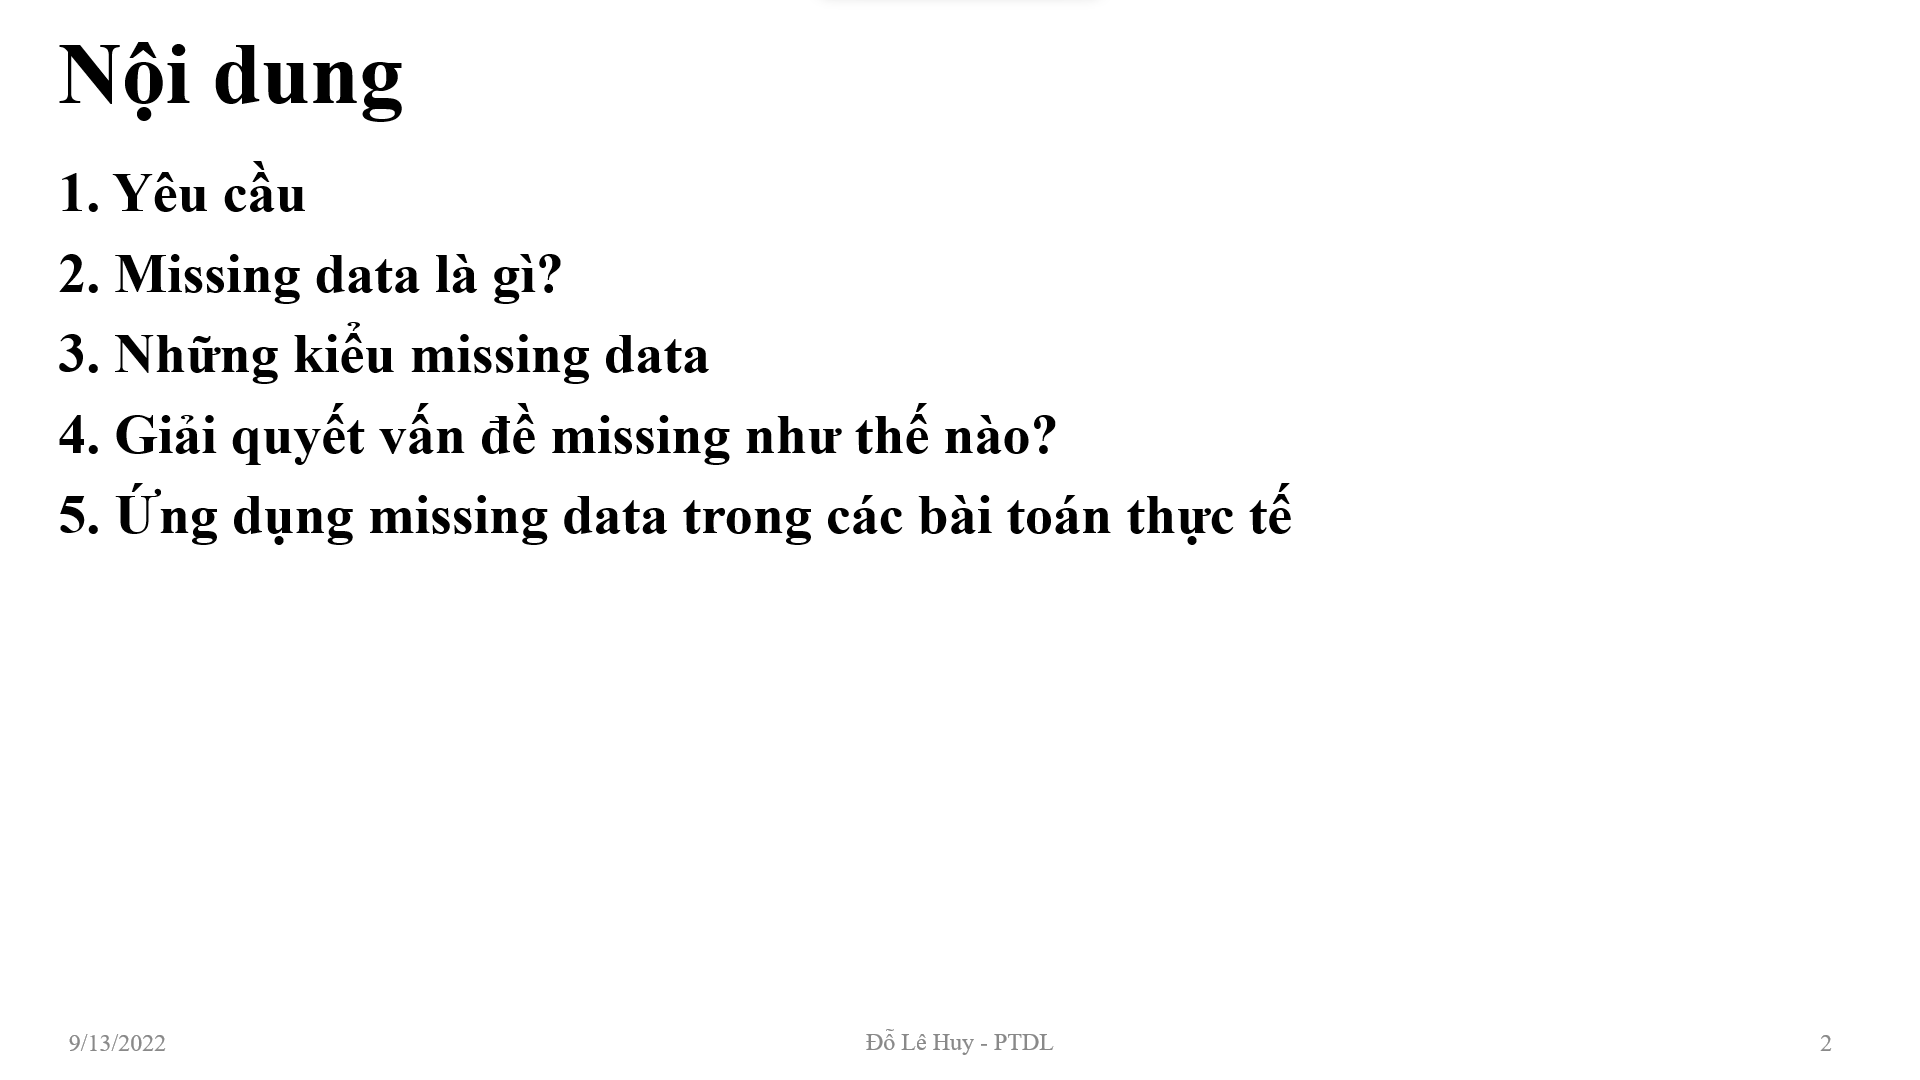

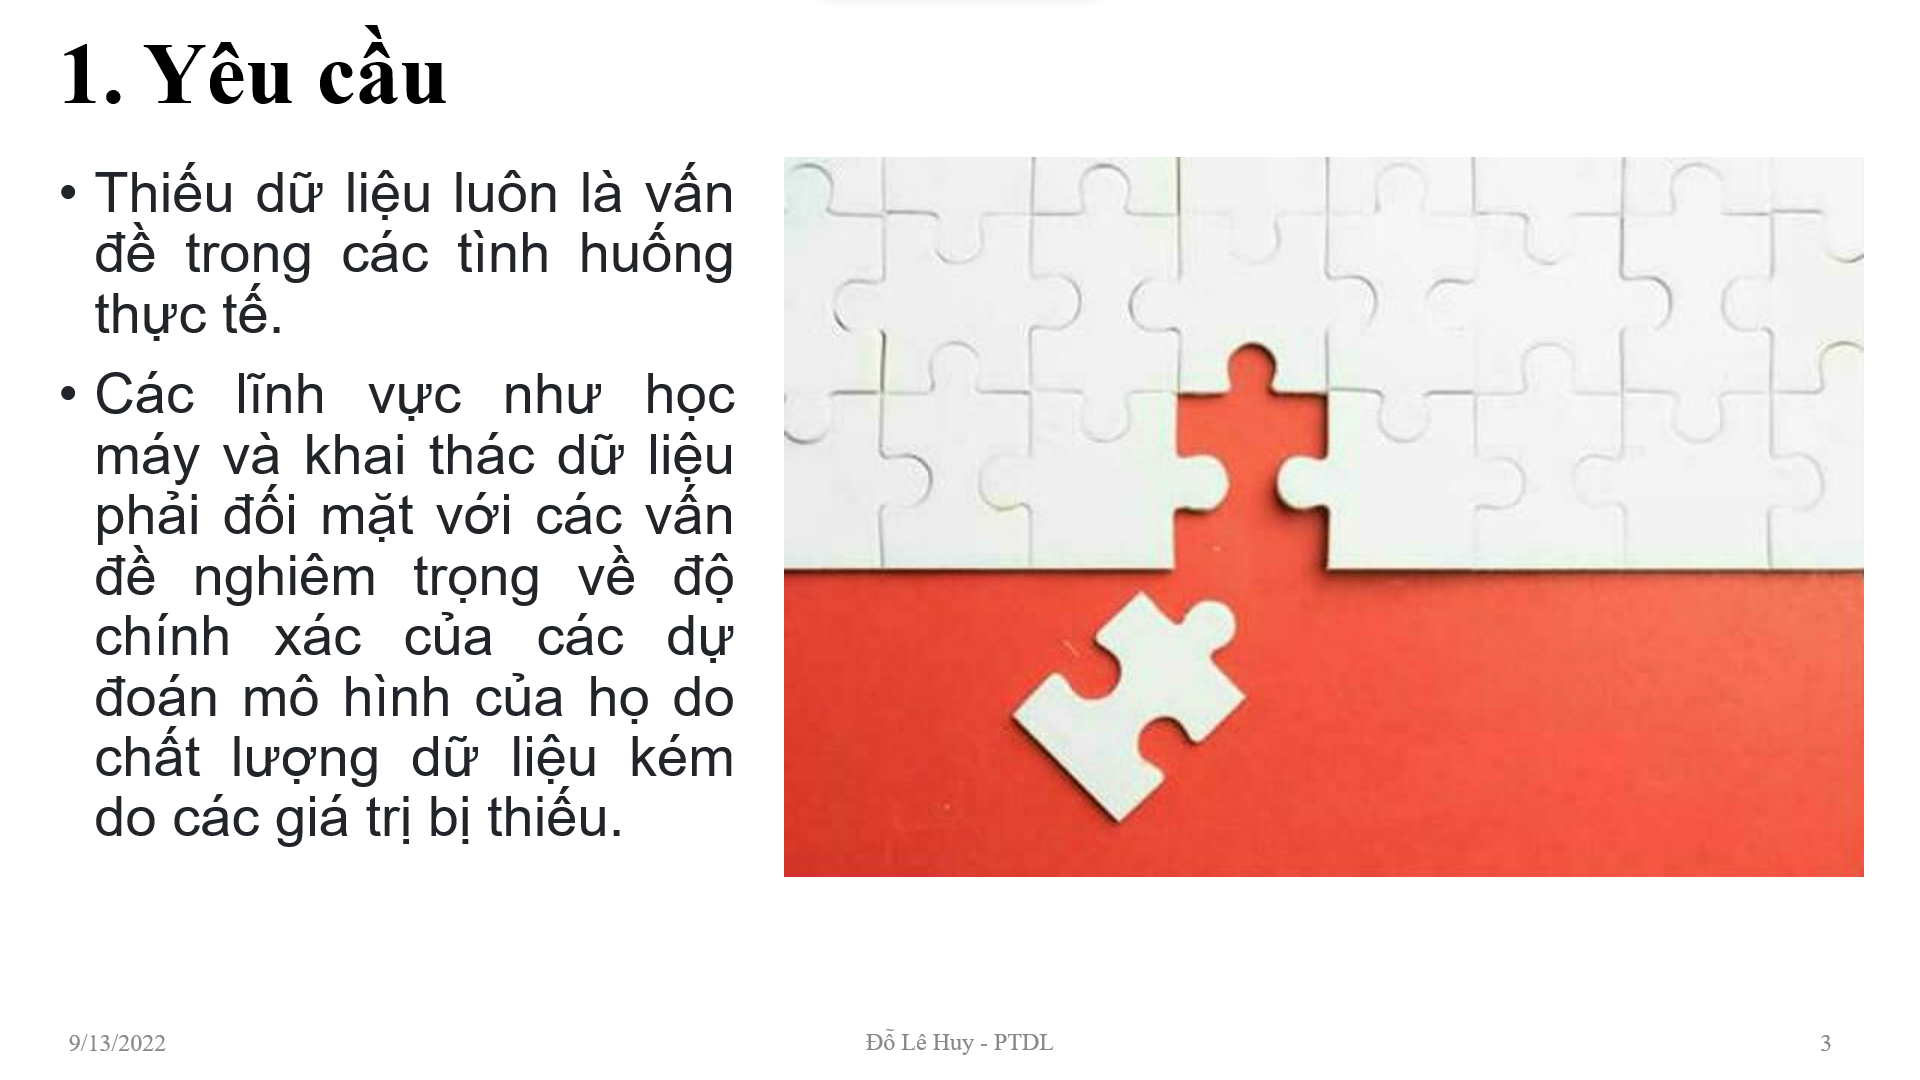

Tiền xử lý dữ liệu là một bước rất quan trọng trong việc giải quyết bất kỳ vấn đề nào trong lĩnh vực Học Máy. Hầu hết các bộ dữ liệu được sử dụng trong các vấn đề liên quan đến Học Máy cần được xử lý, làm sạch và biến đổi trước khi một thuật toán Học Máy có thể được huấn luyện trên những bộ dữ liệu này. Các kỹ thuật tiền xử lý dữ liệu phổ biến hiện nay bao gồm: xử lý dữ liệu bị khuyết (missing data), mã hóa các biến nhóm (encoding categorical variables), chuẩn hóa dữ liệu (standardizing data), co giãn dữ liệu (scaling data),… Những kỹ thuật này tương đối dễ hiểu nhưng sẽ có nhiều vấn đề phát sinh khi chúng ta áp dụng vào các dữ liệu thực tế. Bởi lẽ các bộ dữ liệu ứng với các bài toán trong thực tế rất khác nhau và mỗi bài toàn thì đối mặt với những thách thức khác nhau về mặt dữ liệu. 


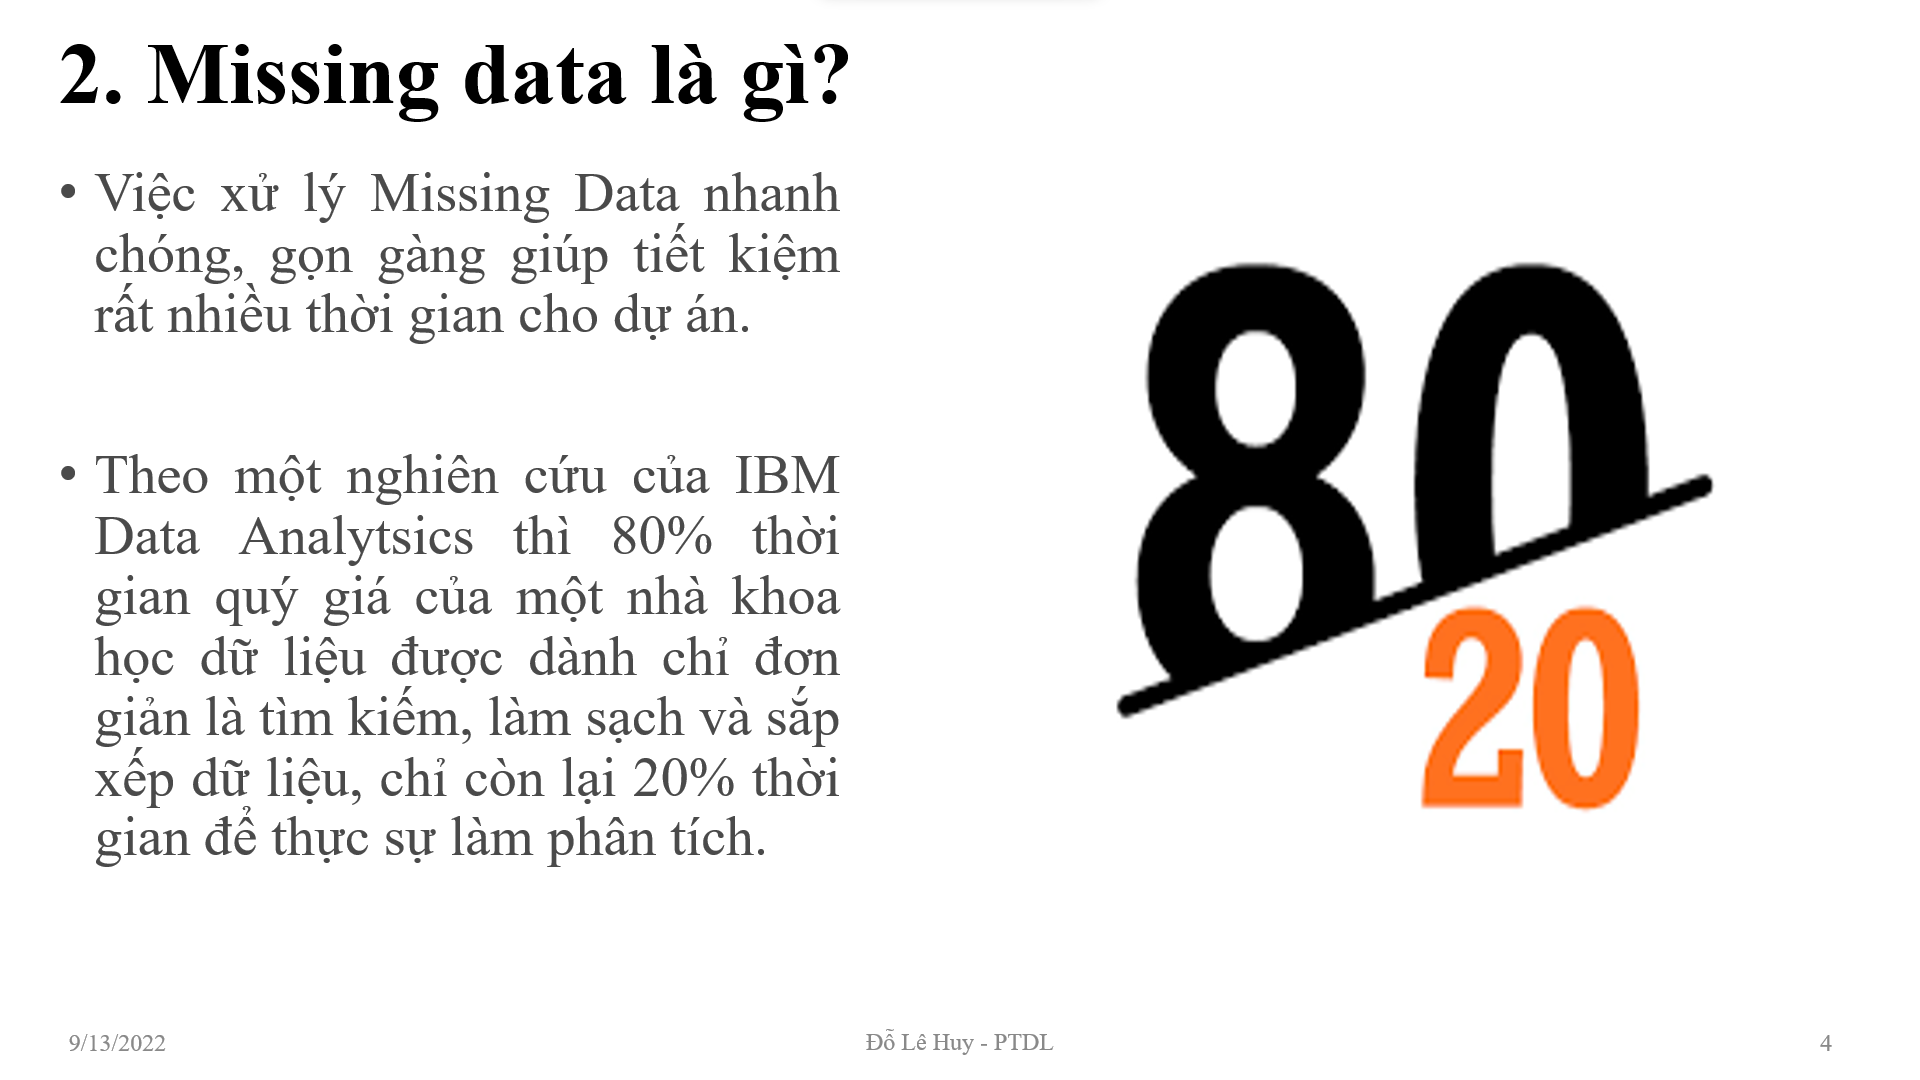

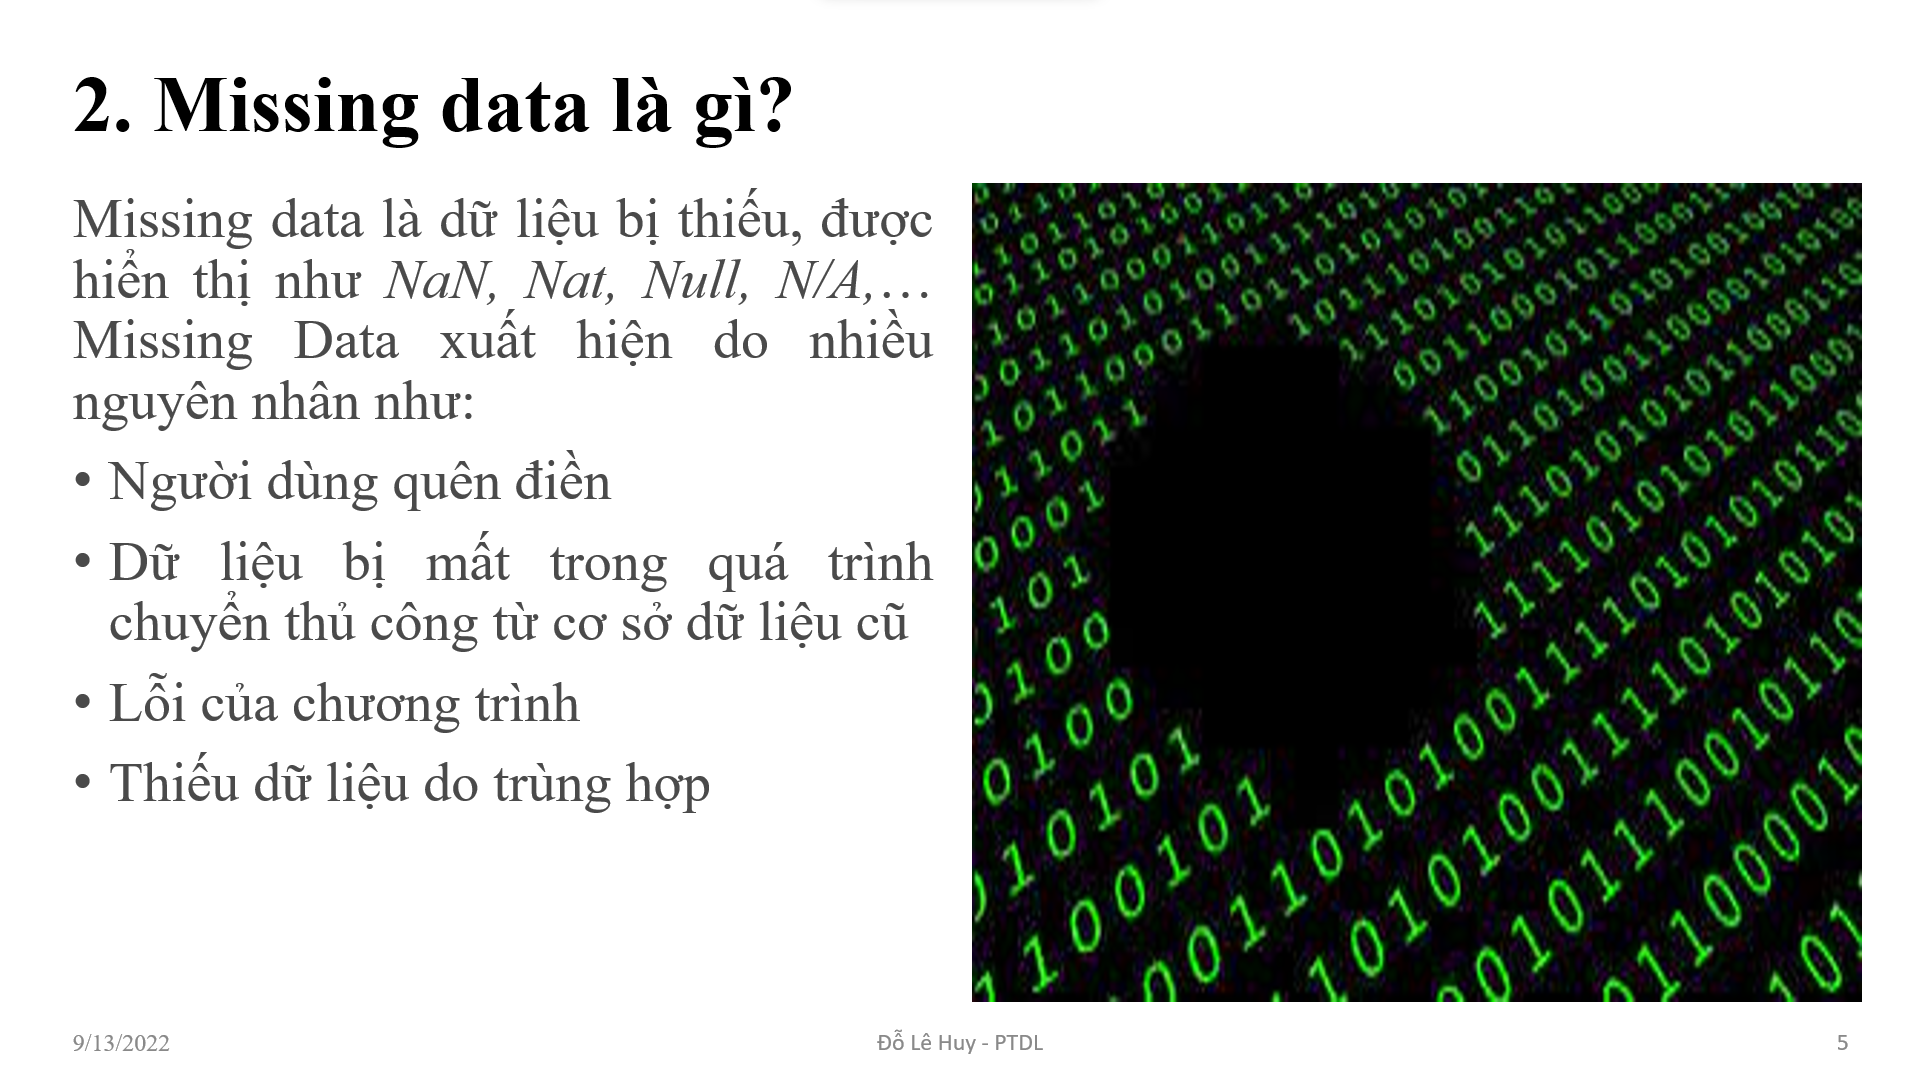

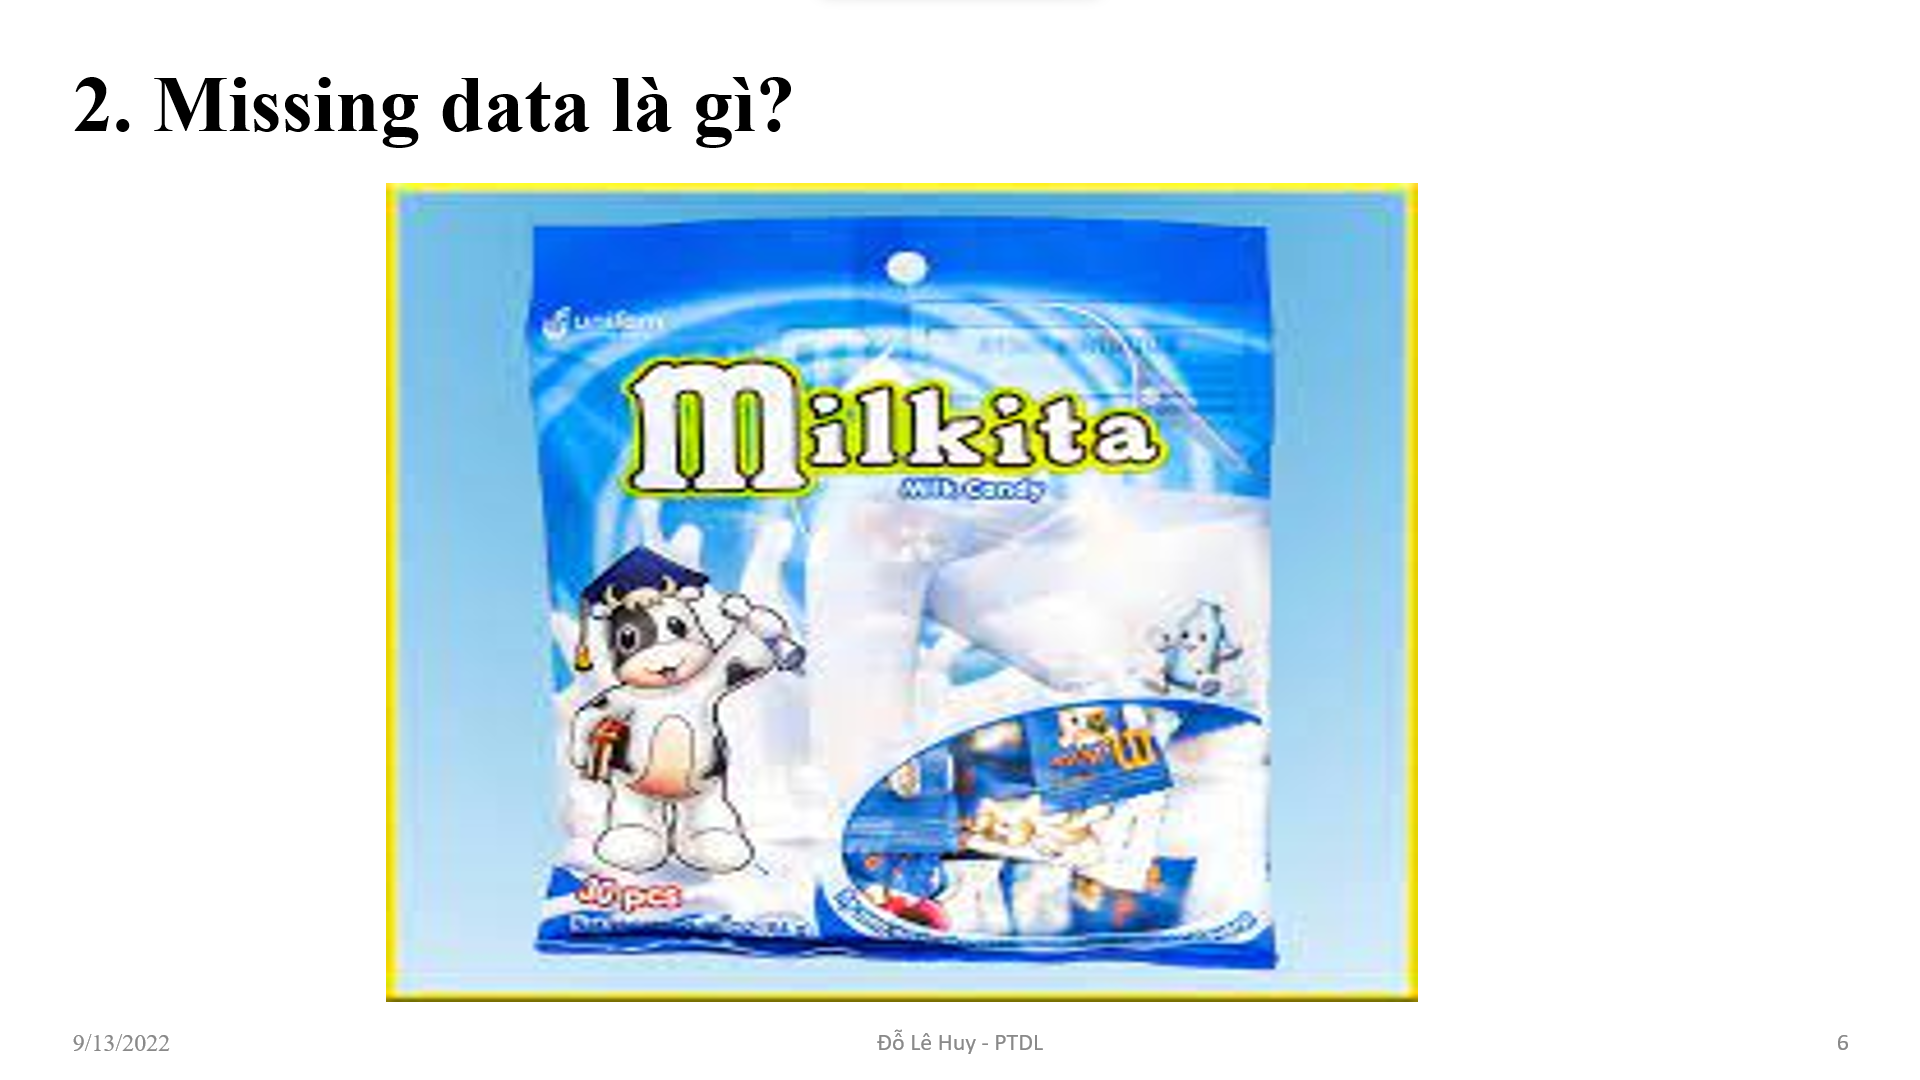

Tiến hành xem xét cuộc khảo sát trực tuyến của một sản phẩm. Nhiều khi, mọi người không chia sẻ tất cả các thông tin liên quan đến họ. Ít người chia sẻ kinh nghiệm , họ đã sử dụng sản phẩm trong bao lâu, trải nghiệm của họ như thế nào, nhưng không chia sẻ thông tin liên hệ . Do đó, theo một cách nào đó hay cách khác, một phần dữ liệu luôn bị thiếu và điều này rất phổ biến trong thực tế.
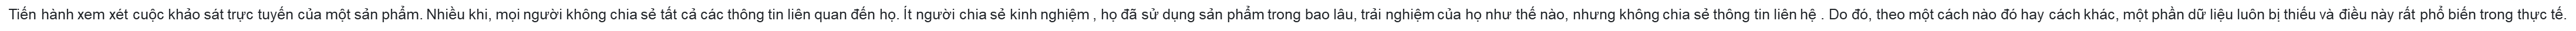

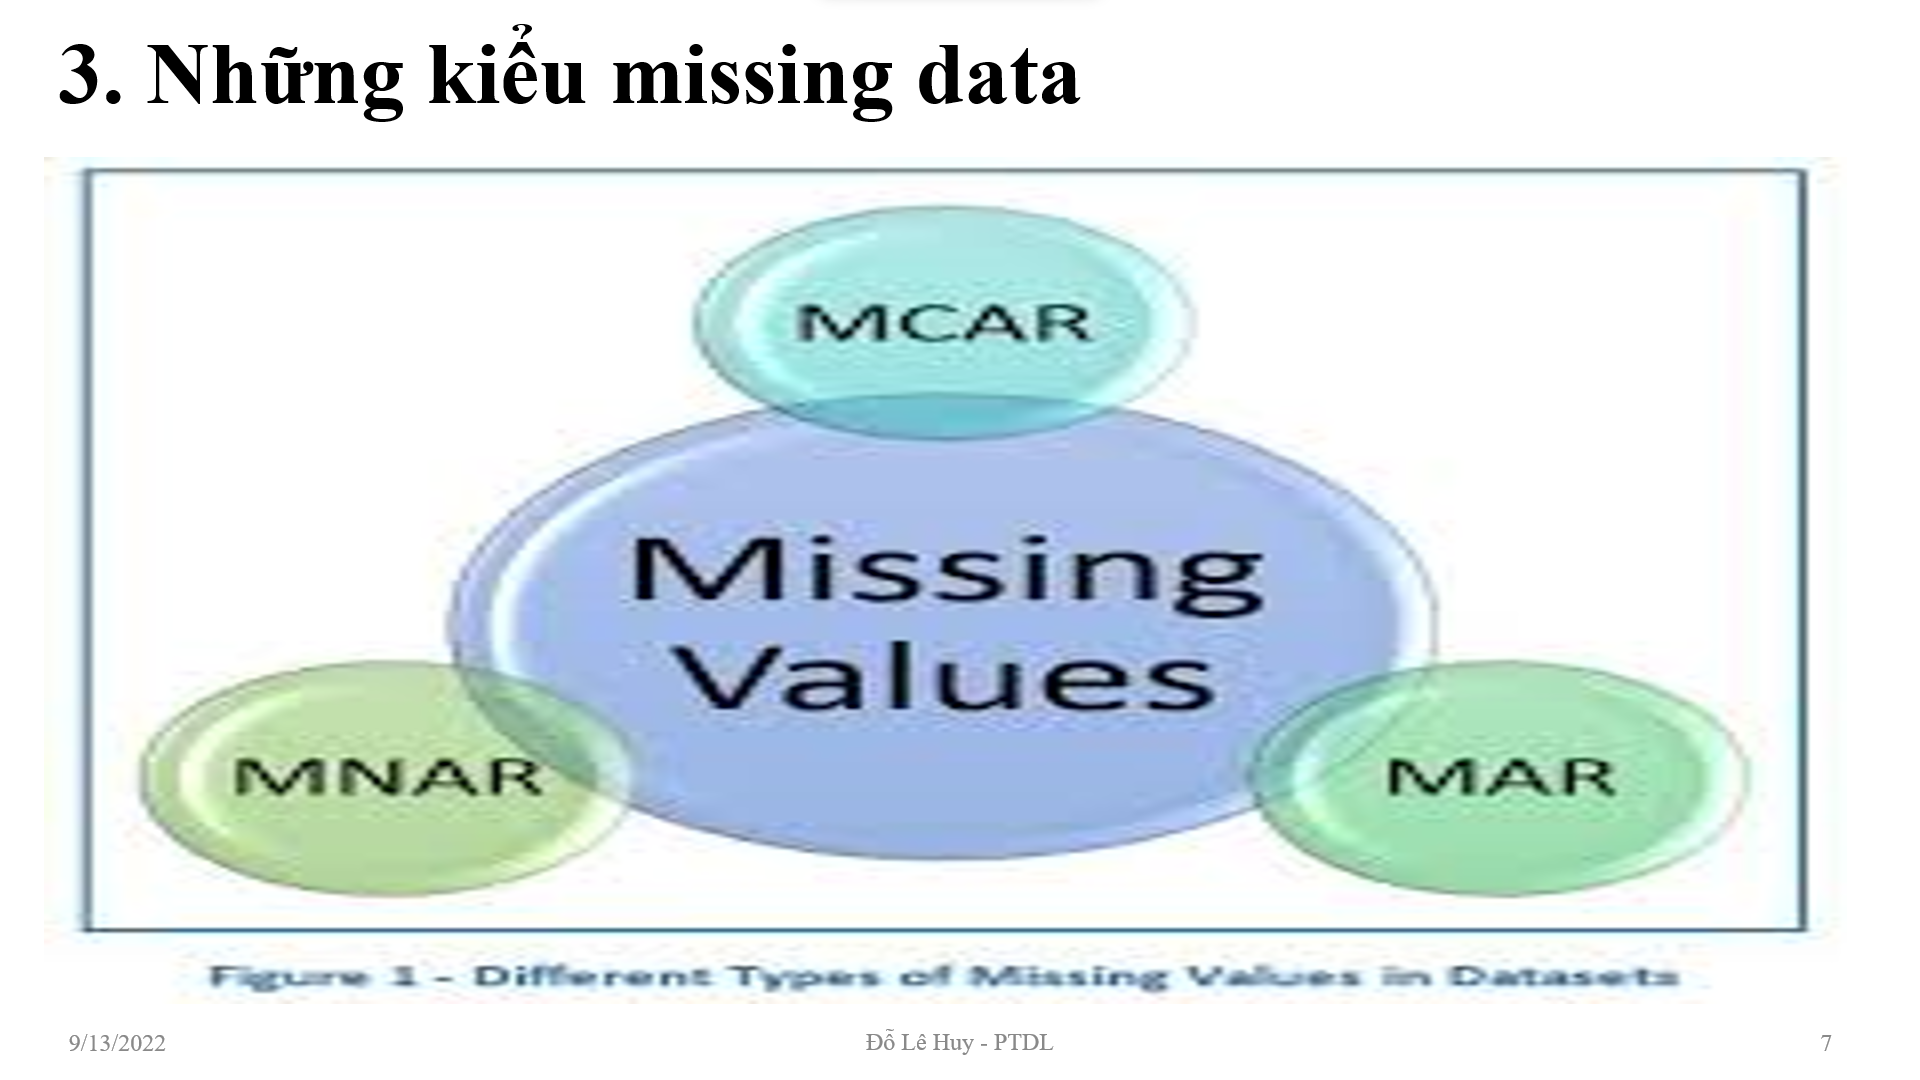

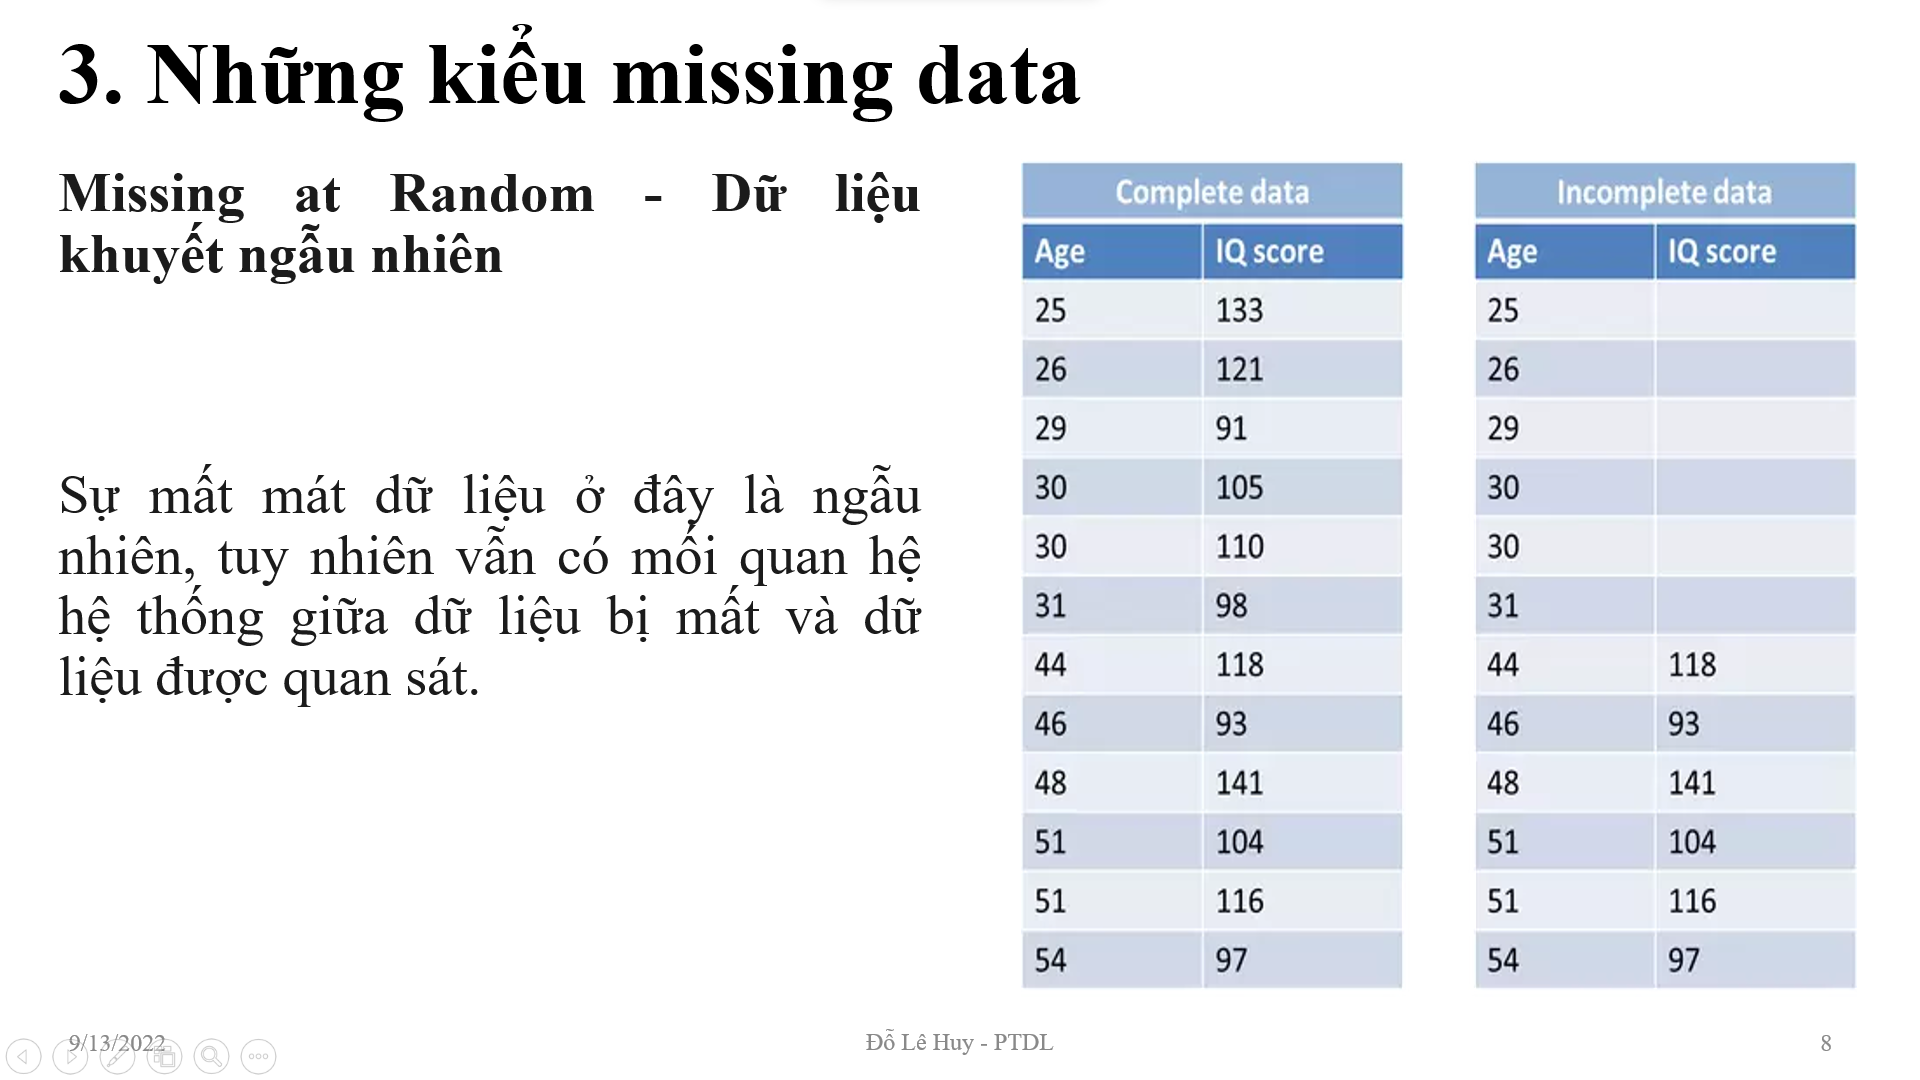

Những người trẻ tuổi bị khuyết dữ liệu về IQ, có nghĩa là có một mối quan hệ hệ thống giữa biến IQ và biến tuổi.


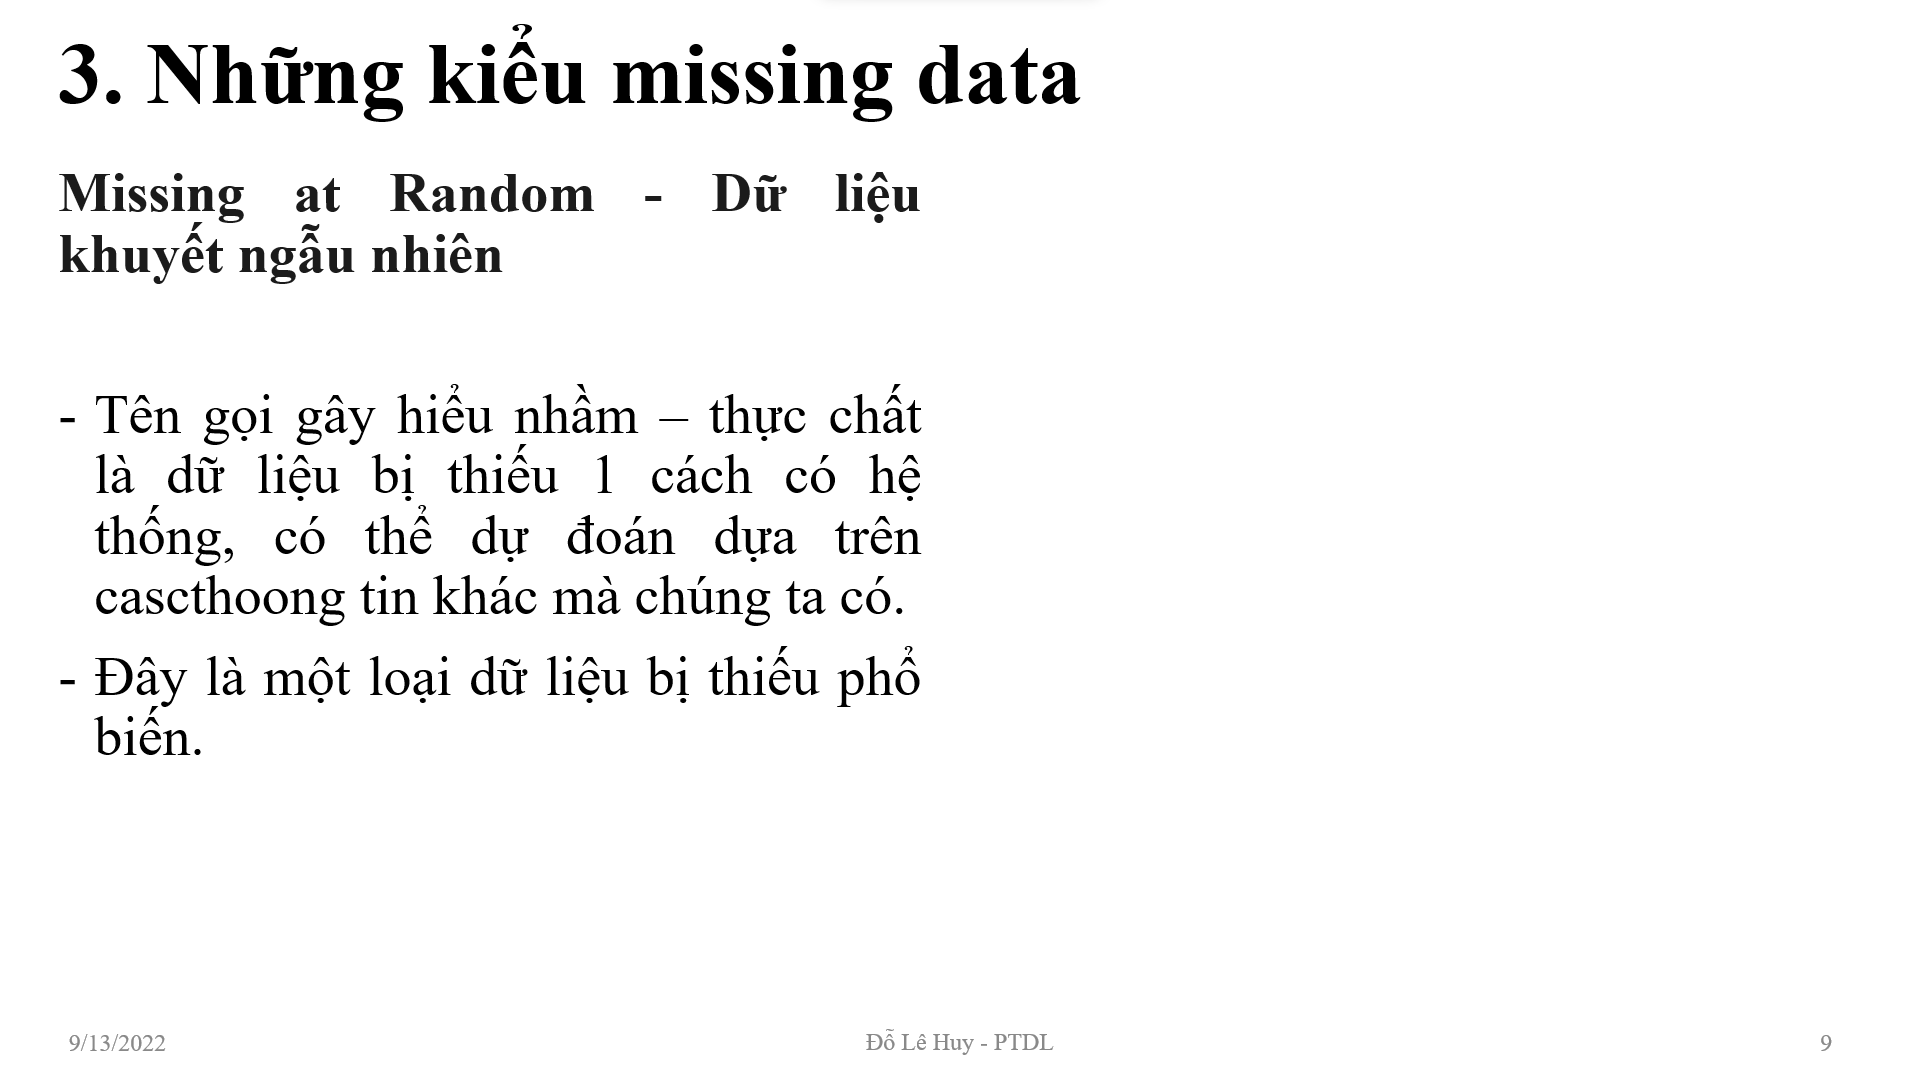

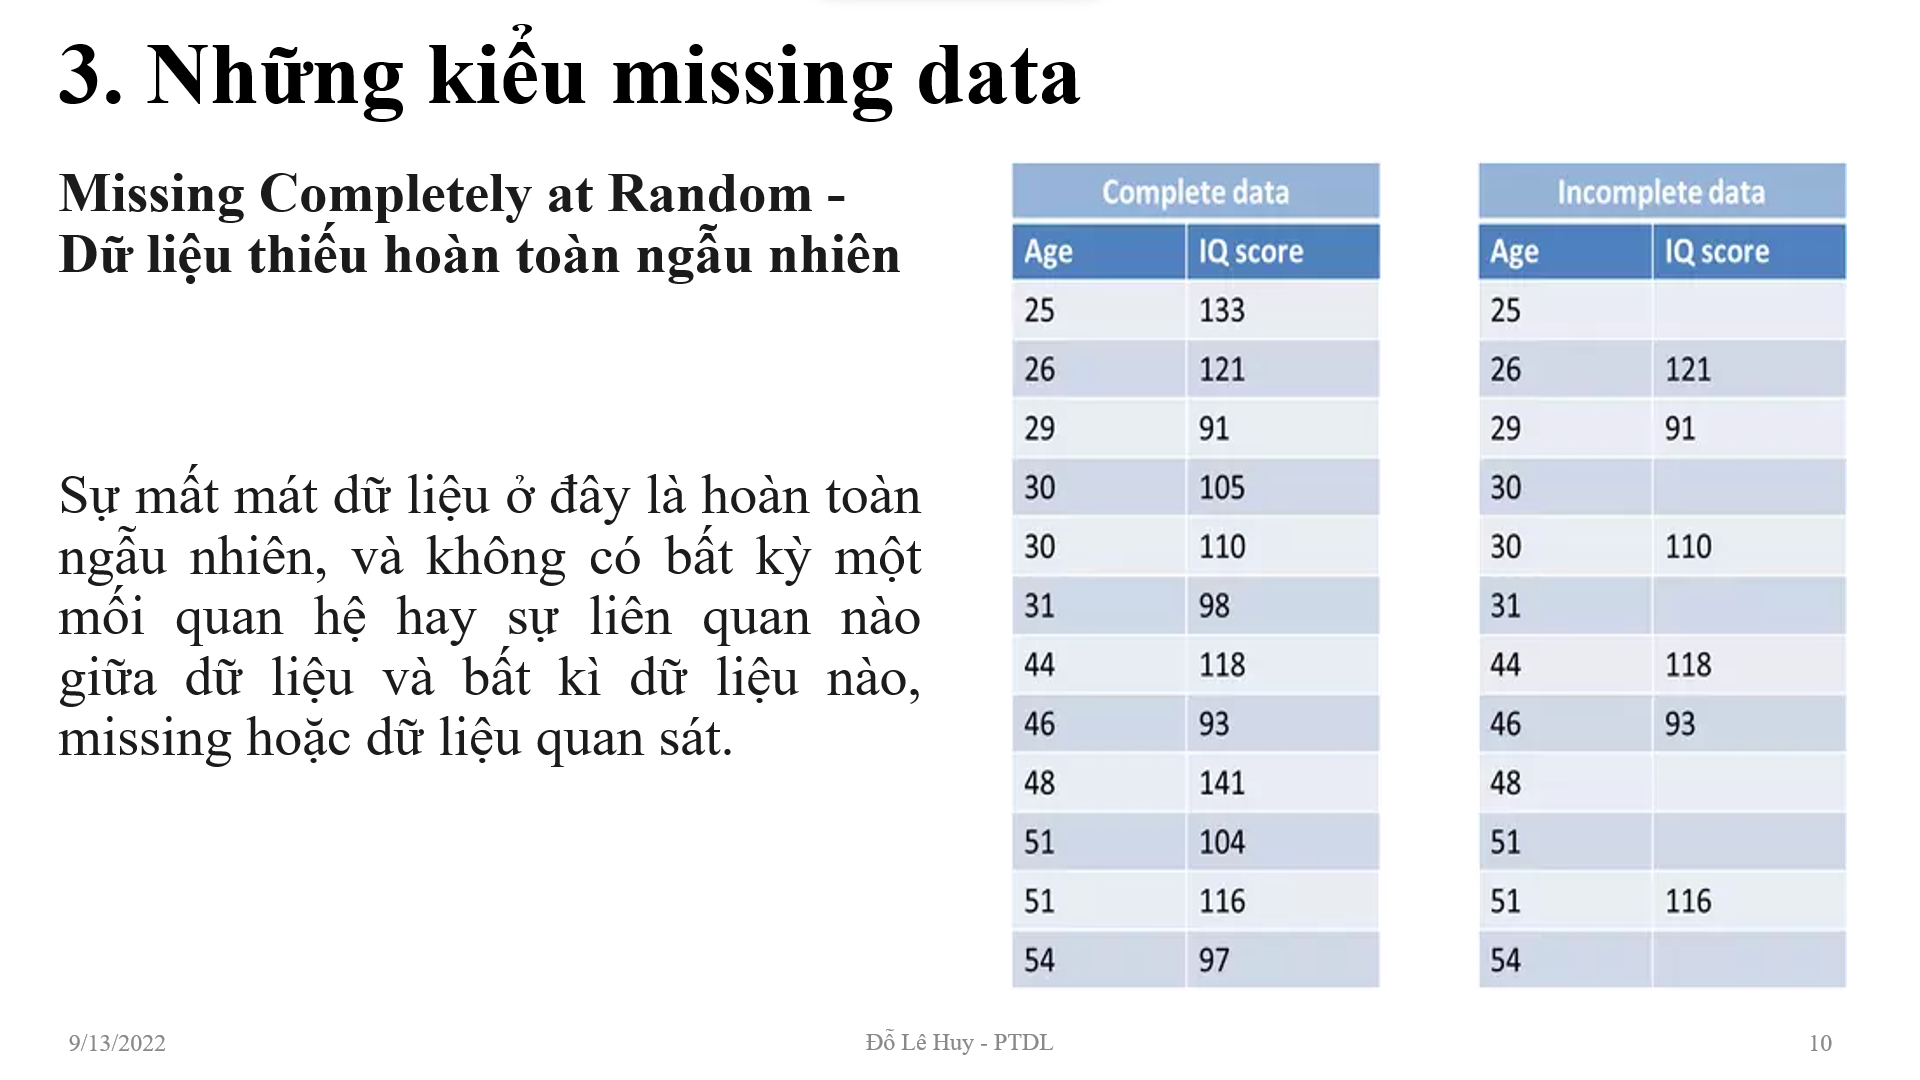

Chúng ta sẽ không hề tìm thấy một mối quan hệ nào giữa giá trị bị thiếu và giá trị được giữ nguyên.


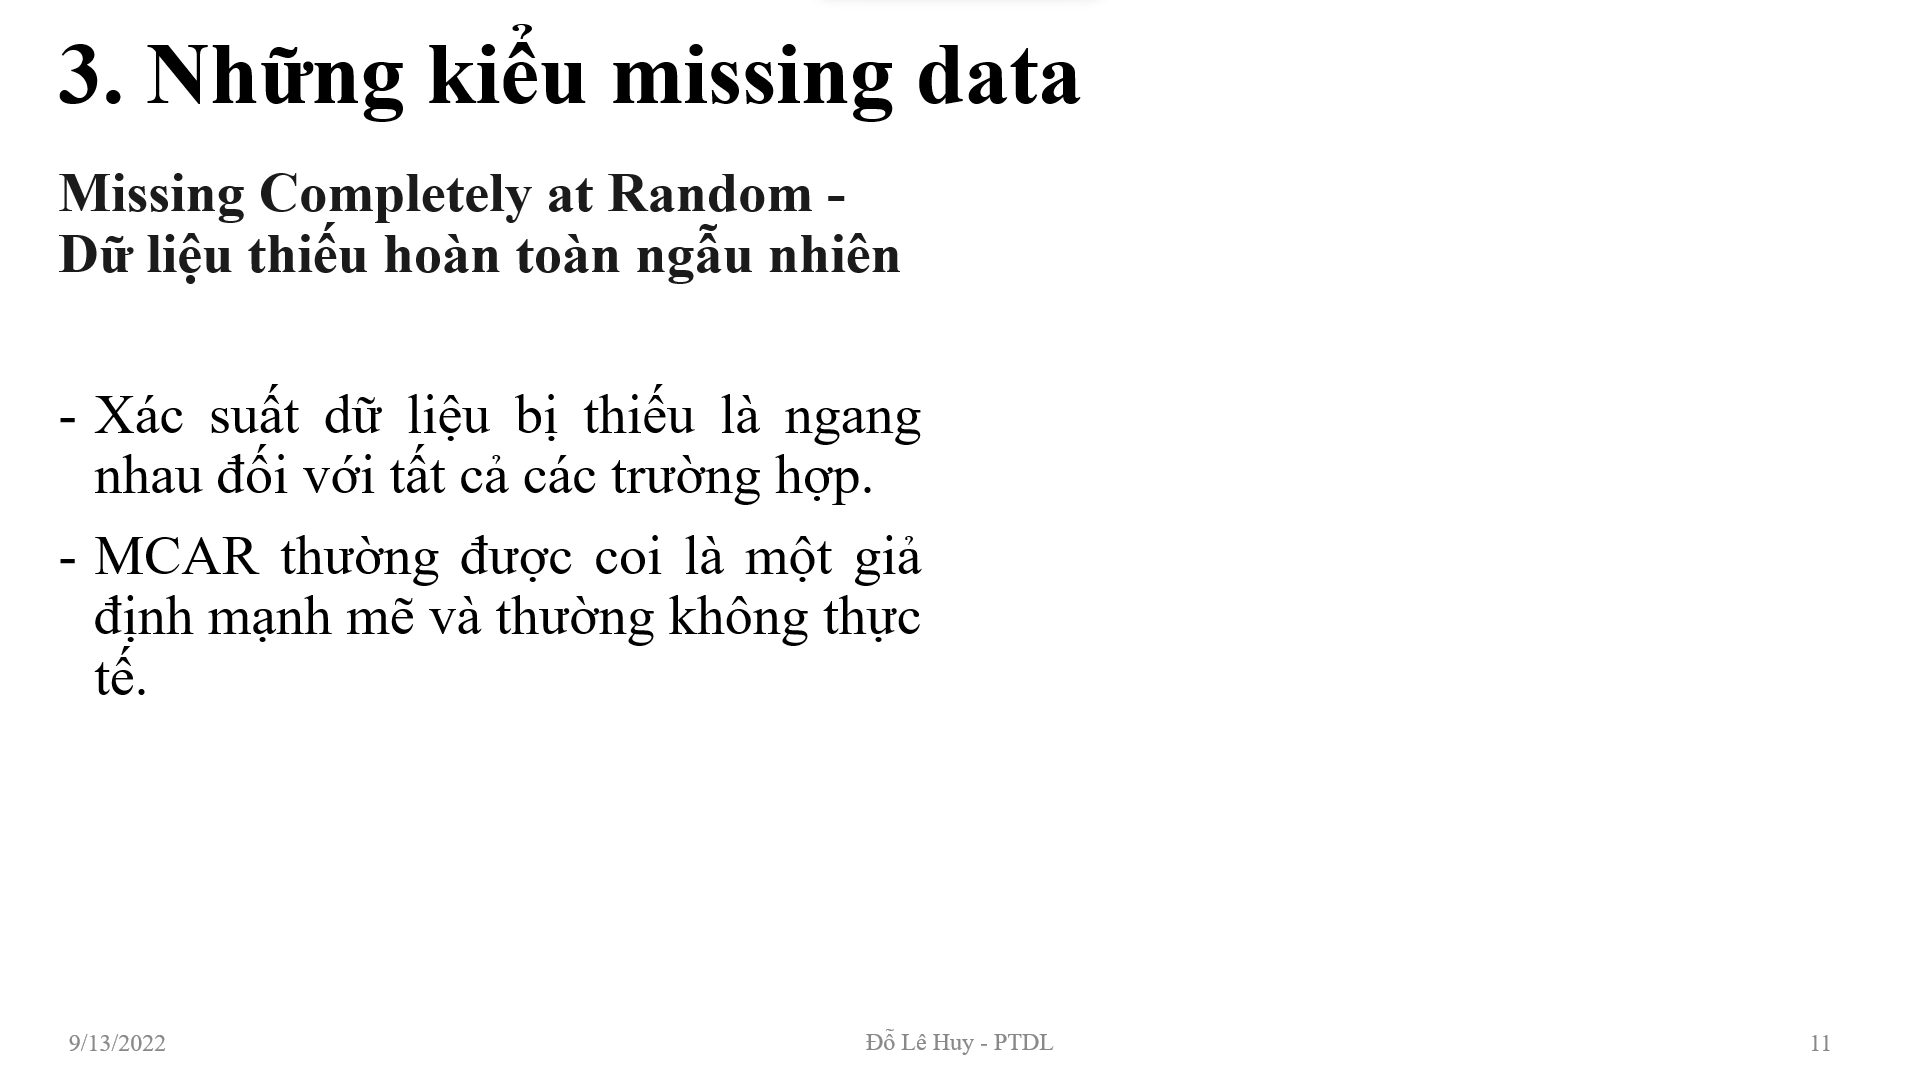

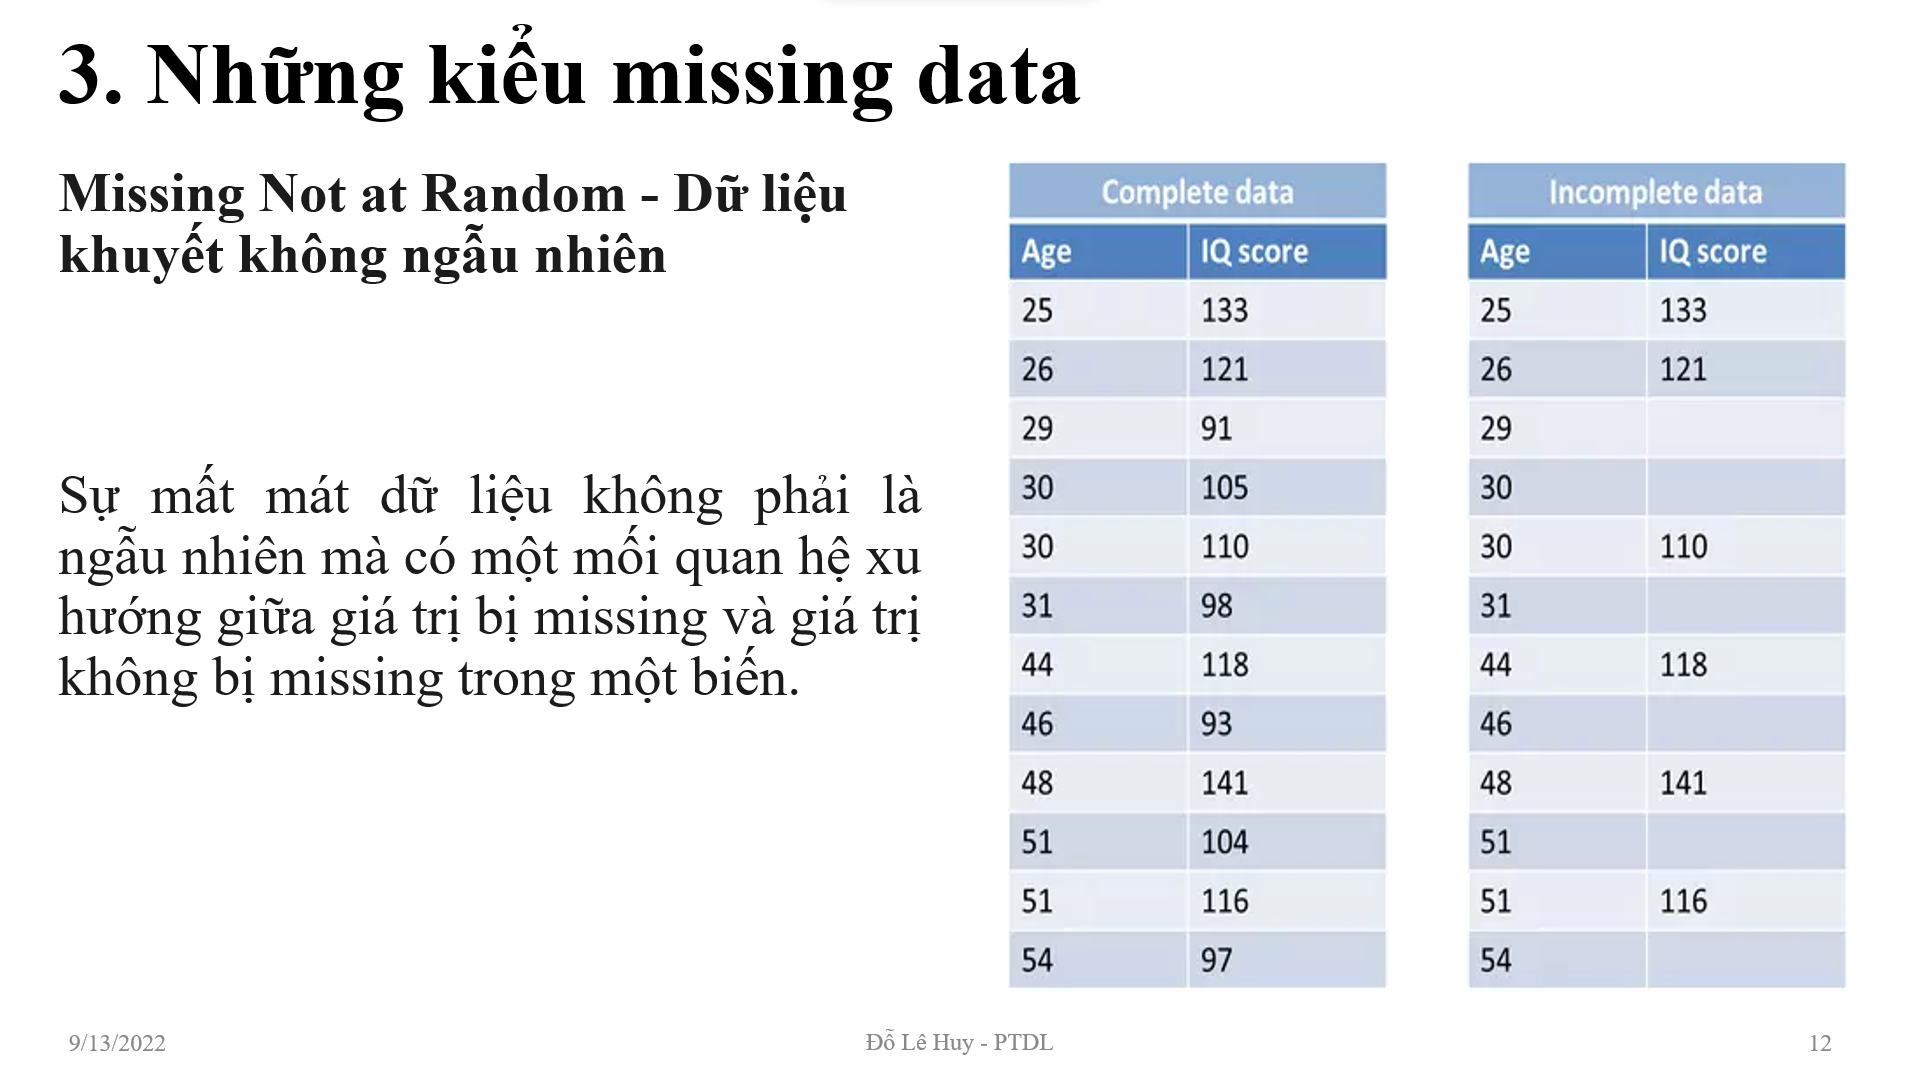

Những người có IQ thấp sẽ bị missing còn IQ cao thì không bị thiếu, có nghĩa là có sự liên quan giữa 2 giá trị missing và không missing trong chính biến IQ.


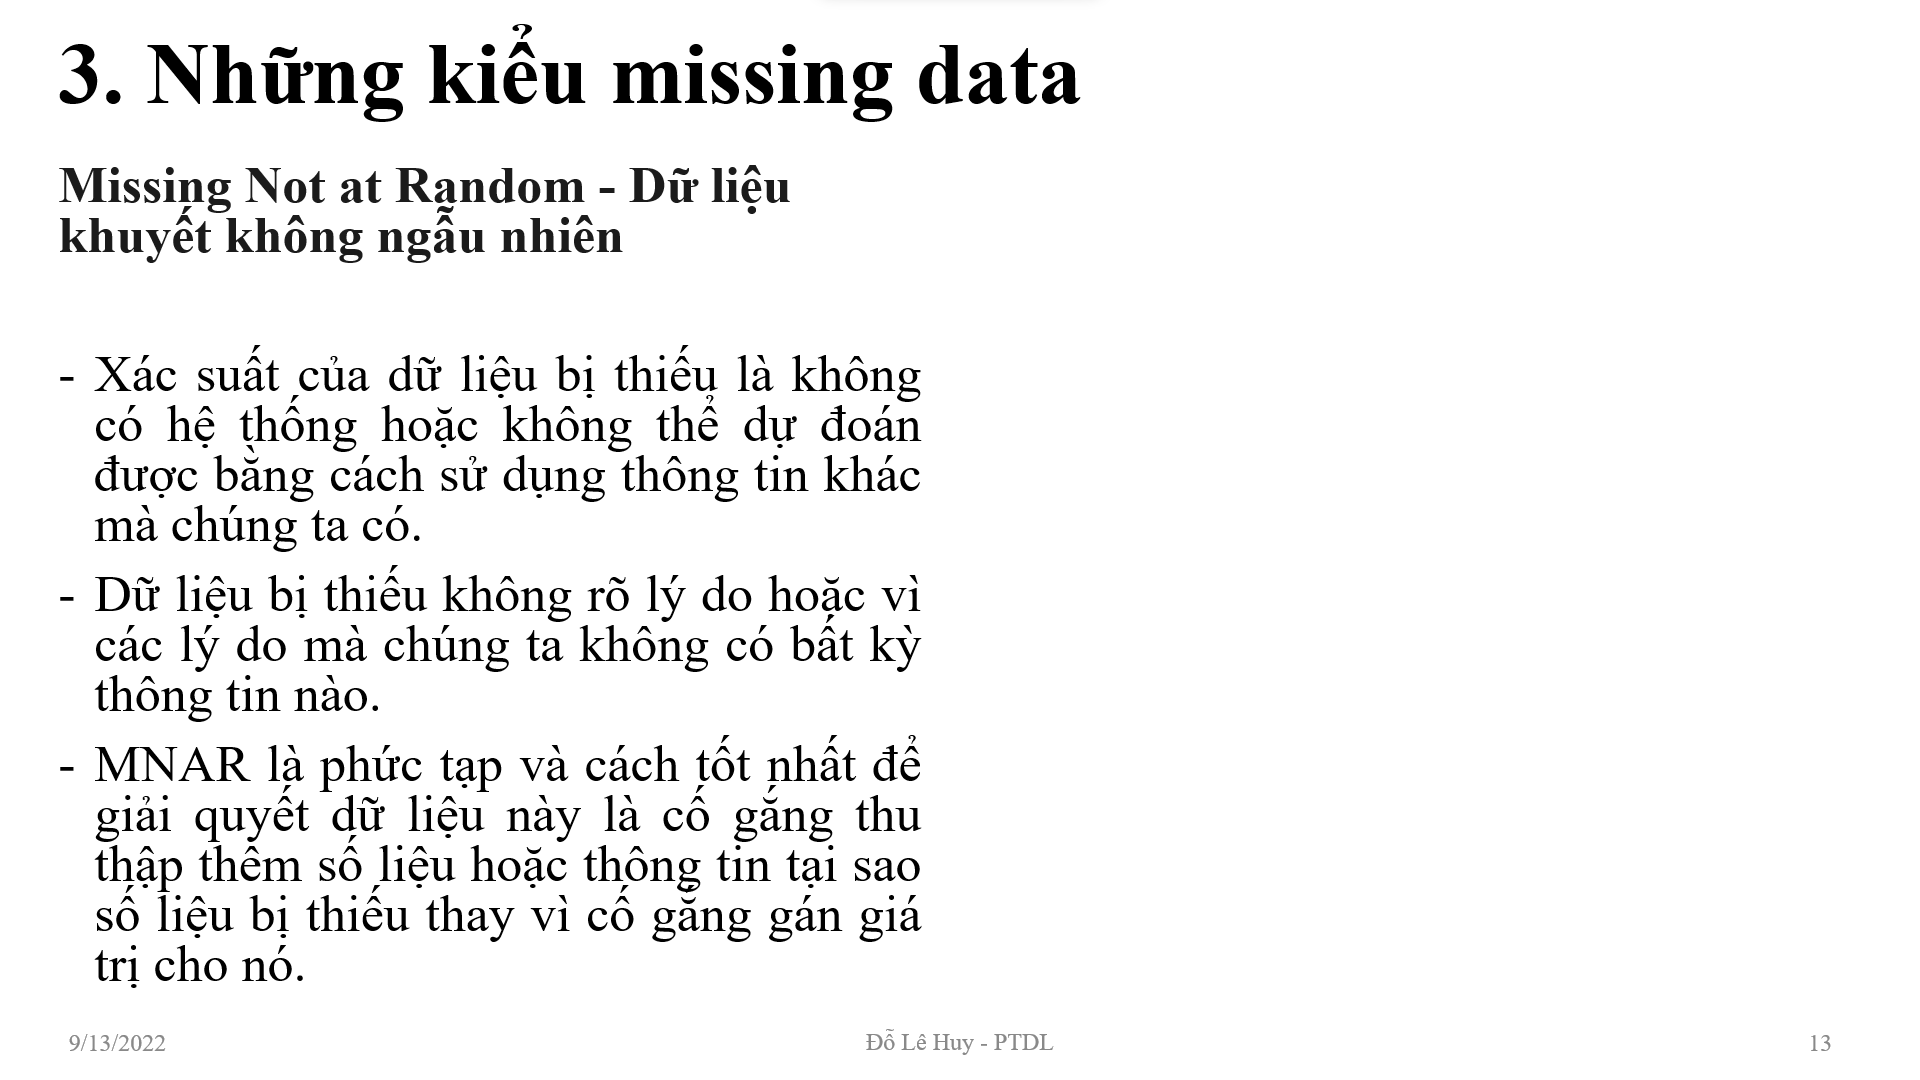

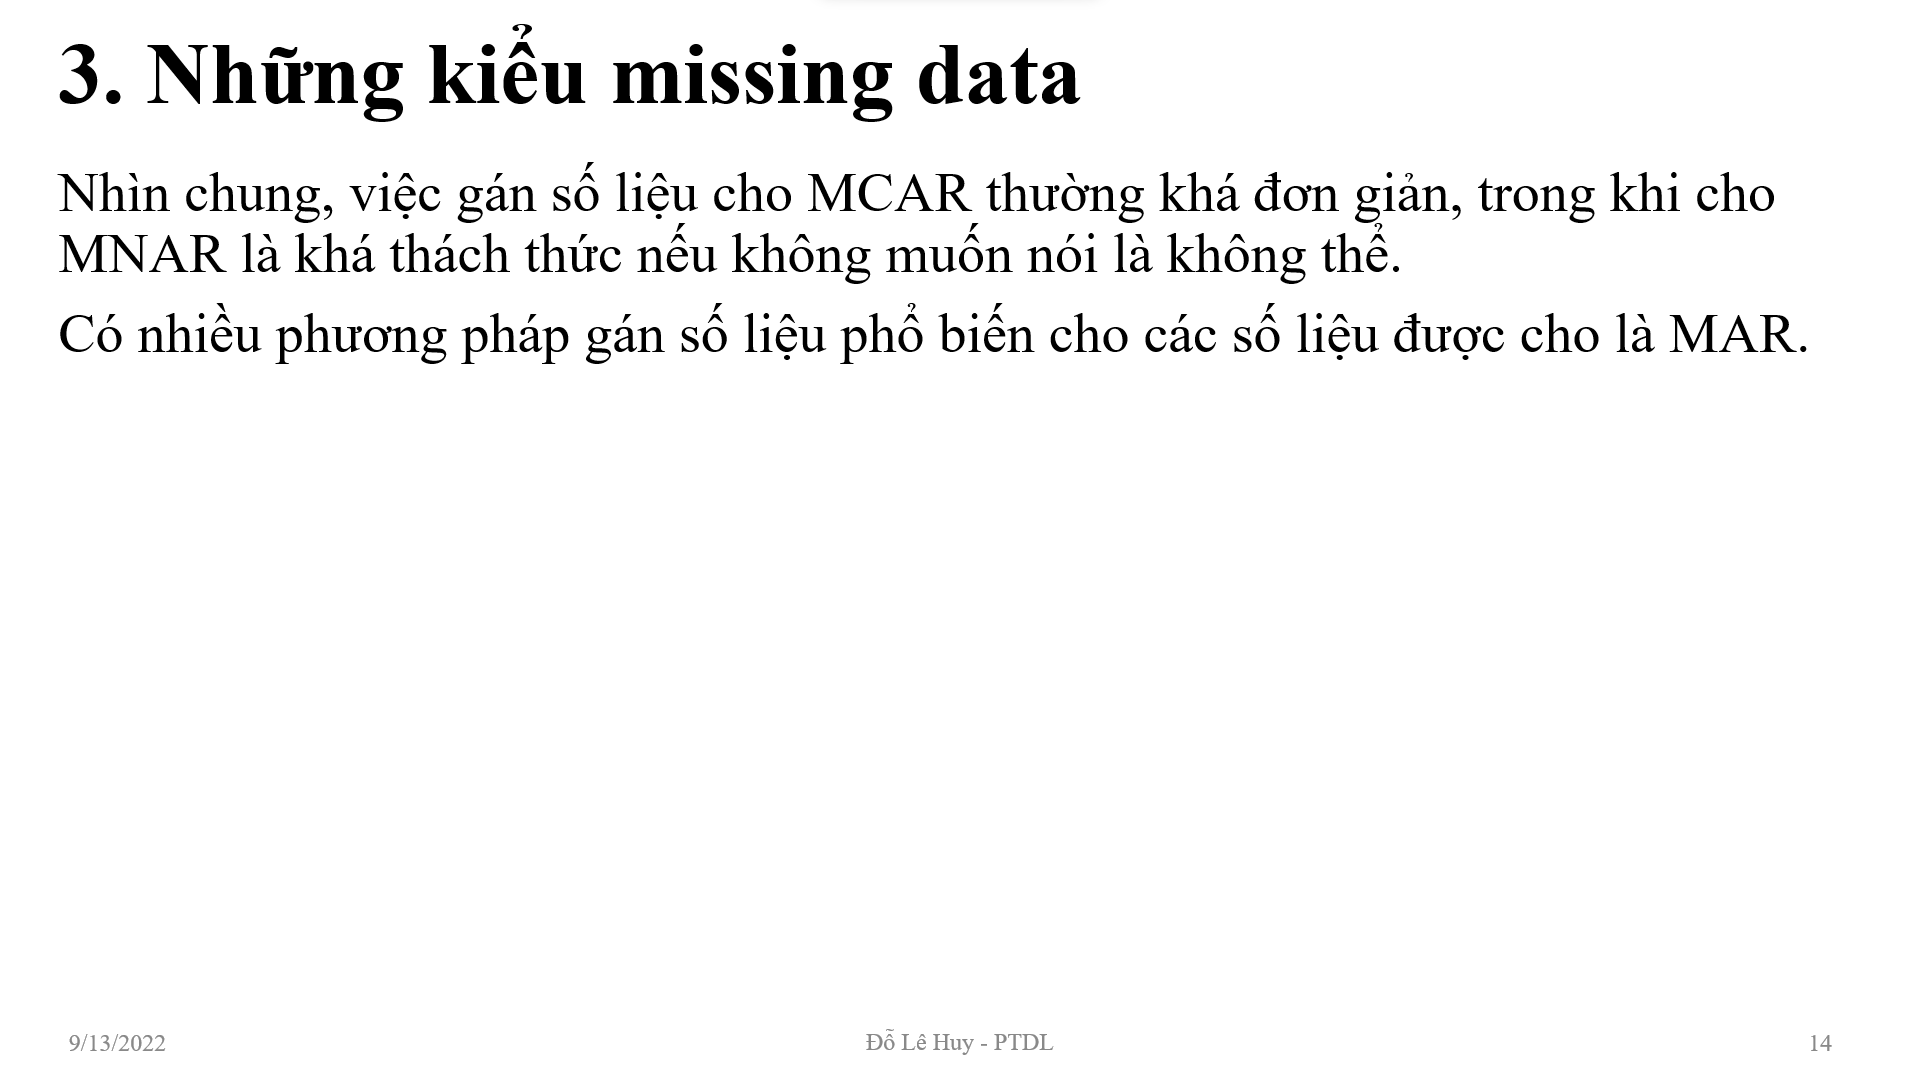

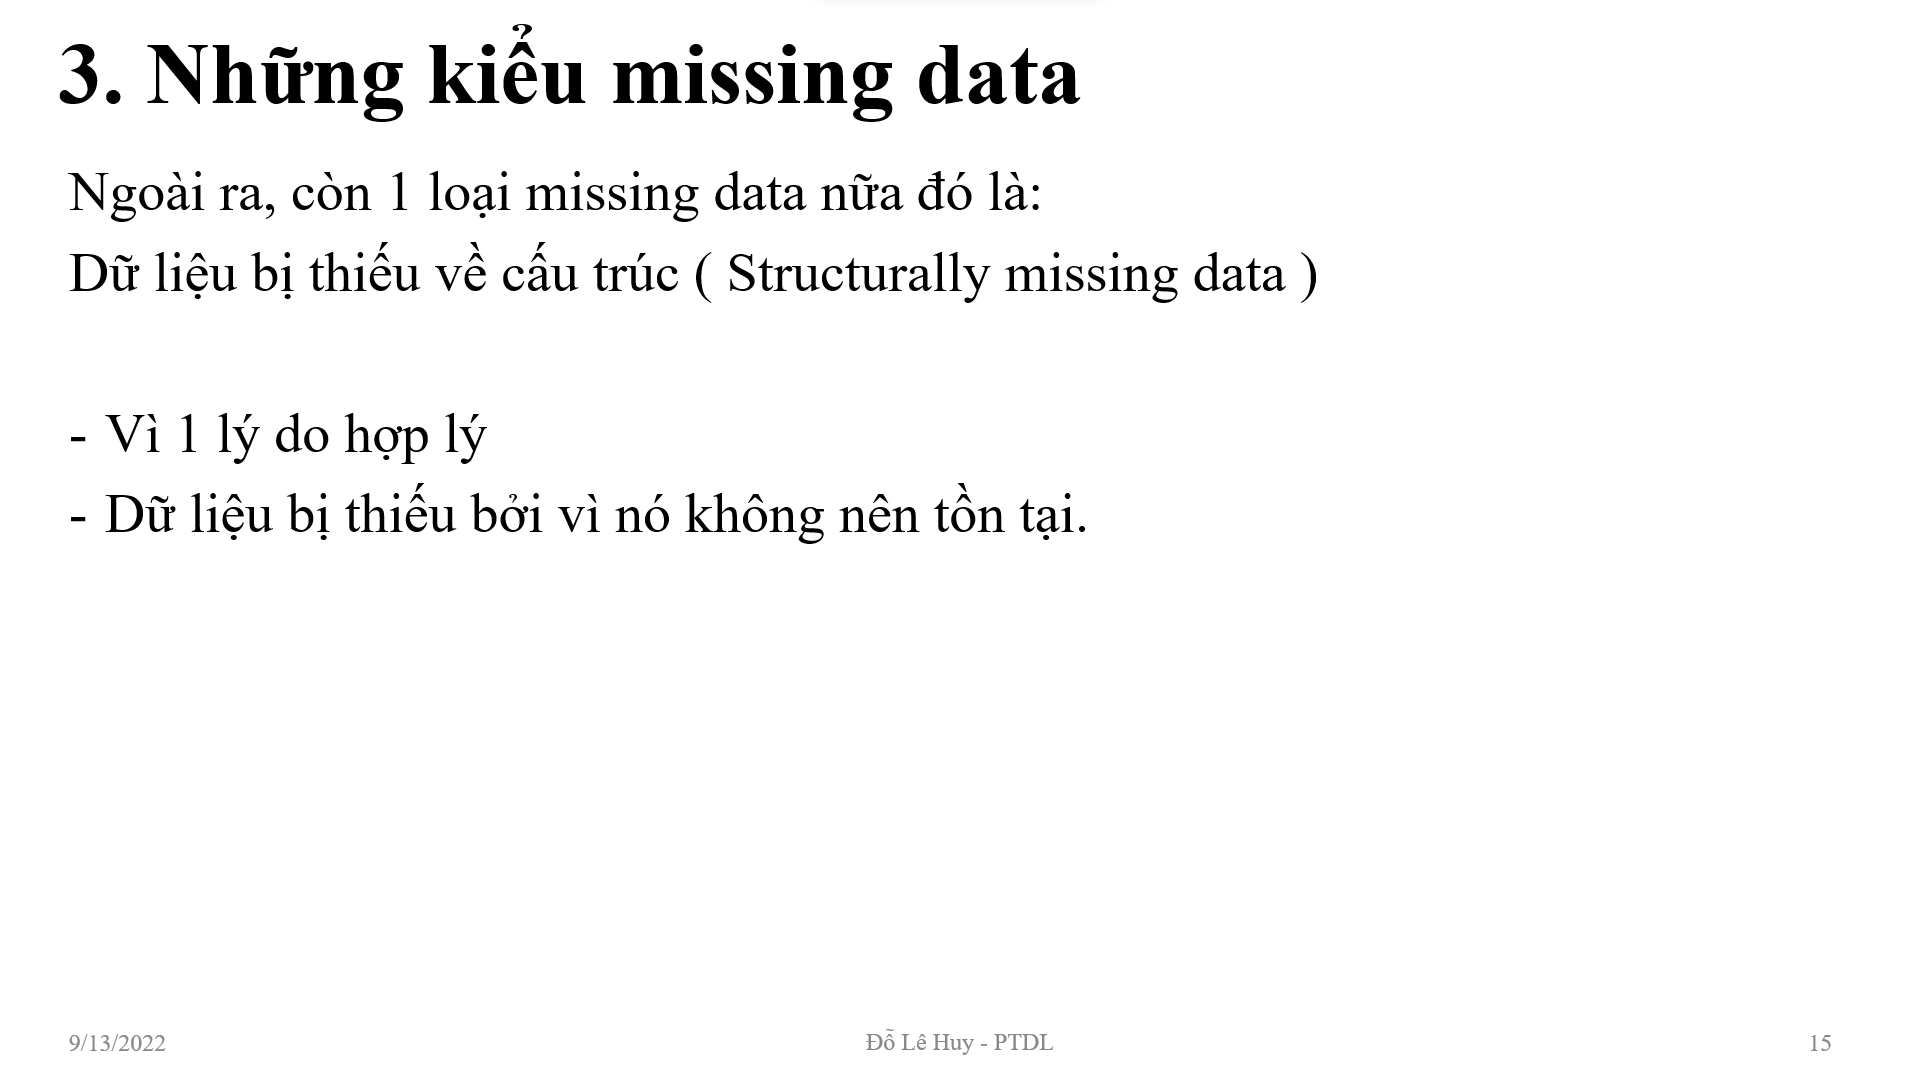

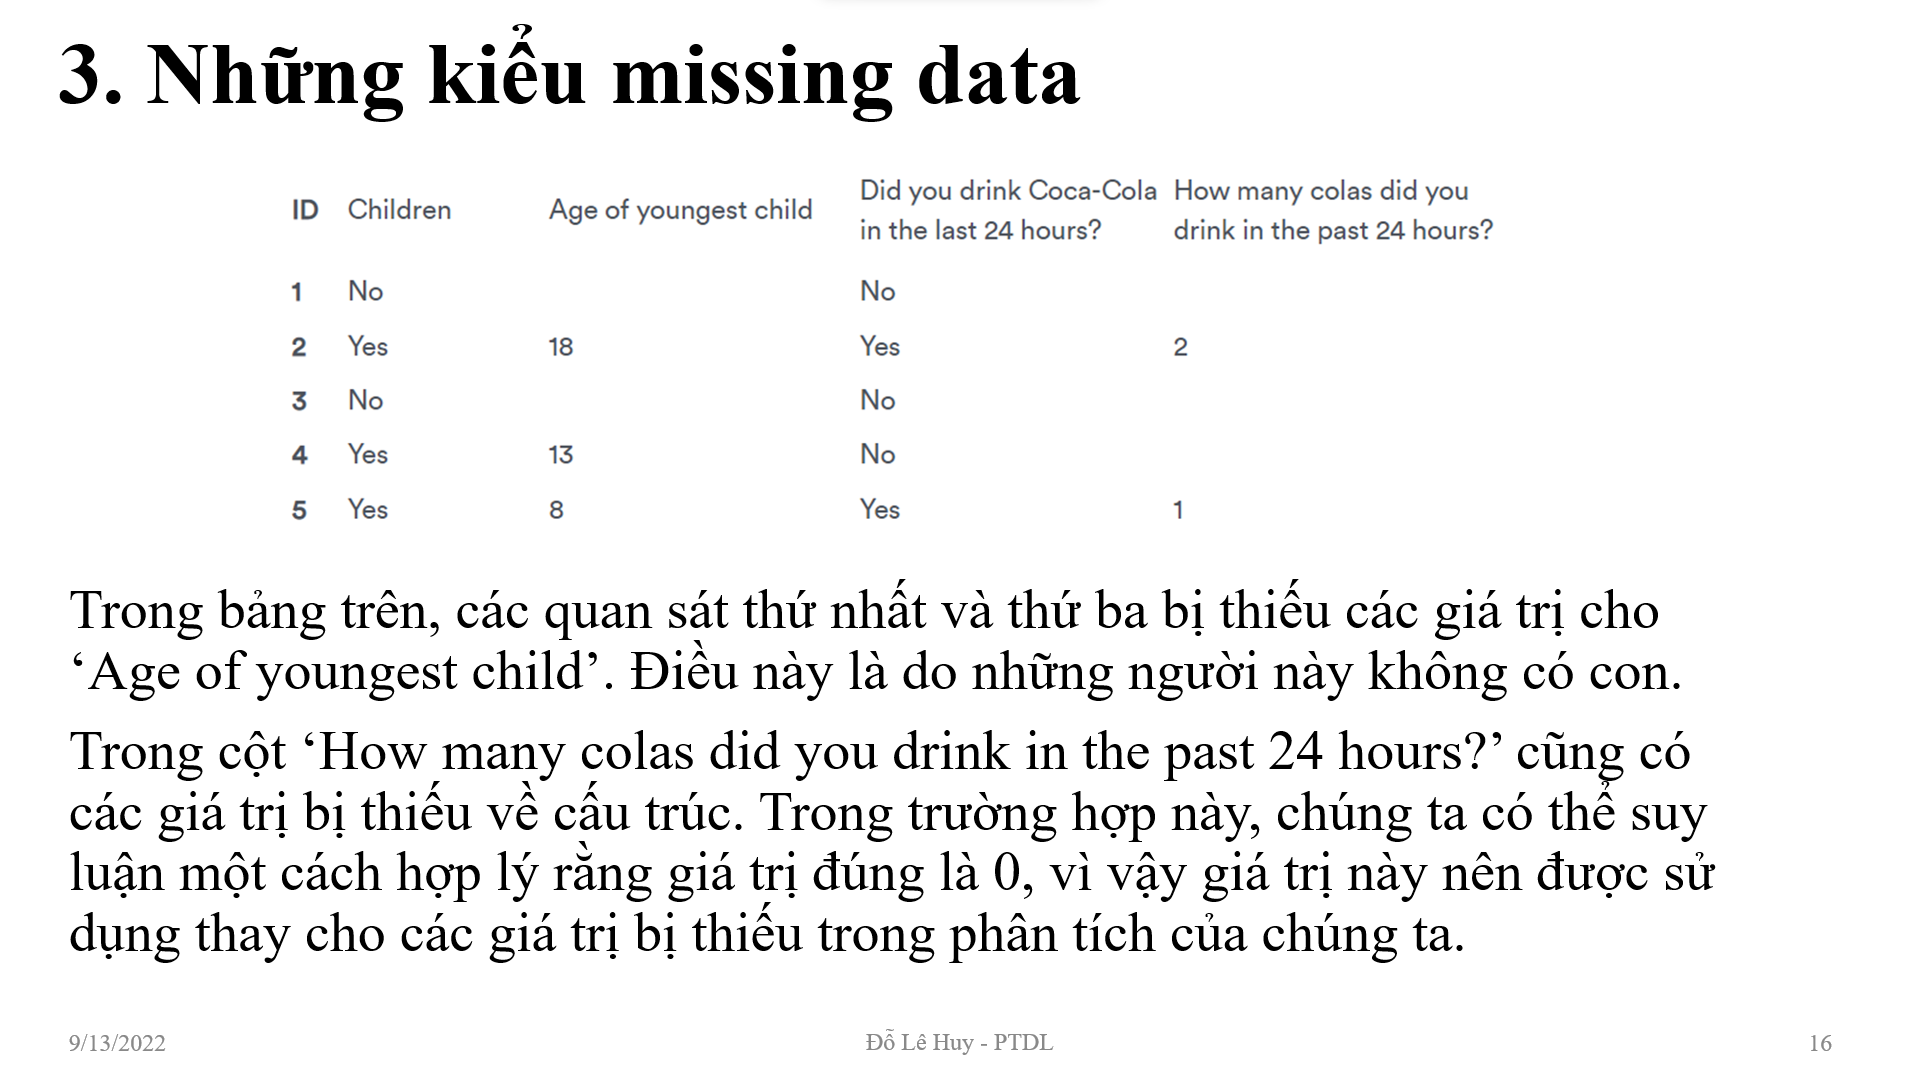

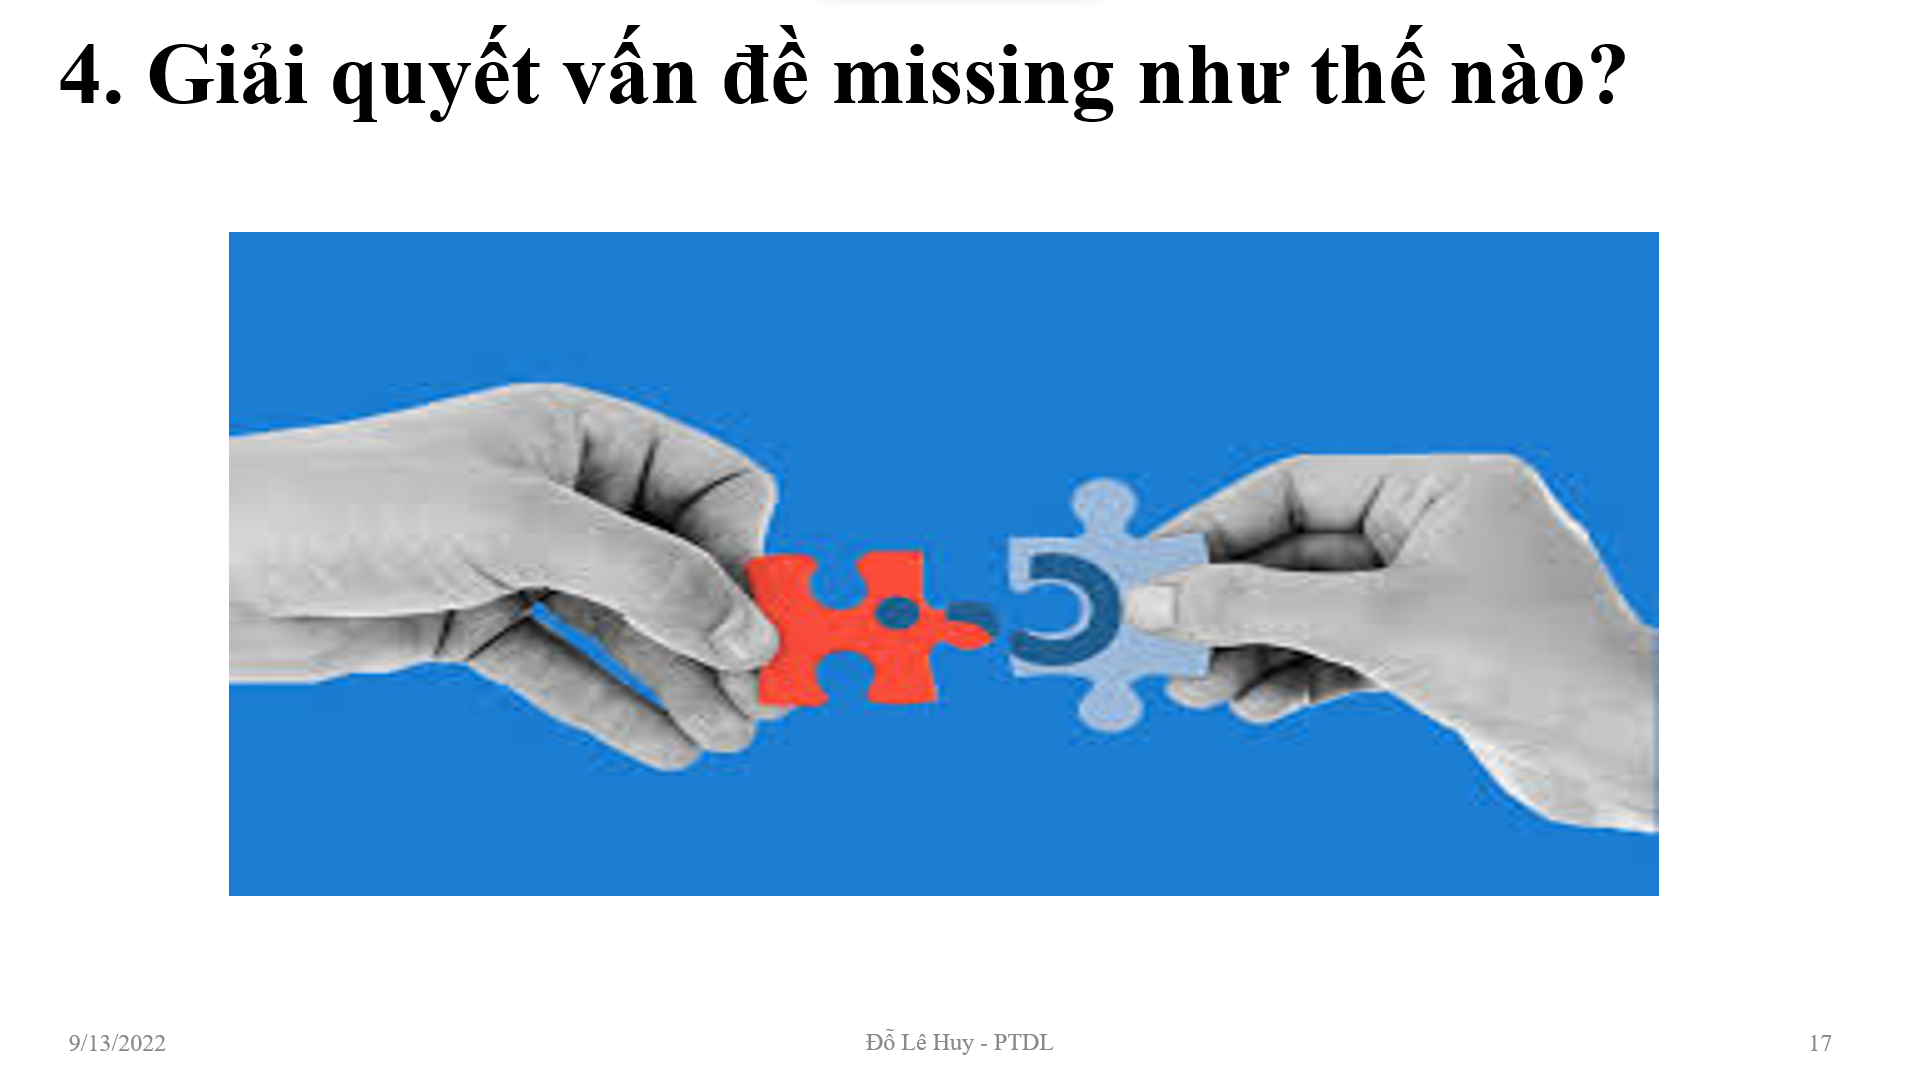

PANDASSSS:
Bây giờ chúng ta hãy xem cách chúng ta có thể xử lý các giá trị bị thiếu (chẳng hạn như NA hoặc NaN) bằng cách sử dụng Pandas.

In [2]:
# import the pandas library
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print(df)

        one       two     three
a  0.304622 -0.742131  0.842513
b       NaN       NaN       NaN
c  0.605987 -0.147402  0.291062
d       NaN       NaN       NaN
e  0.609213 -0.865414  0.255962
f -0.761821 -0.028900  1.219408
g       NaN       NaN       NaN
h  0.429413 -1.633071  0.021103


Sử dụng reindexing, đã tạo một DataFrame các giá trị bị thiếu. Trong đầu ra, NaN có nghĩa là Không phải số.

***Kiểm tra các giá trị bị thiếu :

Để giúp phát hiện các giá trị bị thiếu dễ dàng hơn (và trên các kiểu mảng khác nhau), Pandas cung cấp các hàm isnull () và notnull (), cũng là các phương thức thuộc Series và DataFrame.

In [3]:
print(df['one'].isnull())

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool


In [4]:
print(df['one'].notnull())

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool


***Các phép tính trong missing data:

Khi tổng hợp dữ liệu, NA sẽ được coi là Zero.

In [5]:
print(df['one'].sum())

1.187413699397393


Nếu dữ liệu đều là NA thì kết quả sẽ là 0.

In [11]:
df = pd.DataFrame(index=[0,1,2,3,4,5],columns=['one','two'])
print(df)
print(df['two'].sum())

   one  two
0  NaN  NaN
1  NaN  NaN
2  NaN  NaN
3  NaN  NaN
4  NaN  NaN
5  NaN  NaN
0


1. Làm sạch / lấp đầy dữ liệu bị thiếu ( Fillna ) :

Pandas cung cấp nhiều phương pháp khác nhau để làm sạch các giá trị bị thiếu. Hàm fillna() có thể “điền vào” các giá trị NA với dữ liệu không phải null theo một số cách, ta sẽ minh họa trong các phần sau.

a. Thay thế NaN bằng Giá trị vô hướng

Thay "NaN" bằng "0" :

In [15]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(3, 3), index=['a', 'c', 'e'],columns=['one',
'two', 'three'])

df = df.reindex(['a', 'b', 'c'])

print(df)
print("NaN replaced with '0':")
print(df.fillna(0))

        one       two     three
a  0.764271 -1.026241 -0.036310
b       NaN       NaN       NaN
c  0.039689  0.942720  3.028431
NaN replaced with '0':
        one       two     three
a  0.764271 -1.026241 -0.036310
b  0.000000  0.000000  0.000000
c  0.039689  0.942720  3.028431


Ở đây, chúng ta đang điền giá trị bằng 0; thay vào đó chúng ta cũng có thể điền vào bất kỳ giá trị nào khác.

df.fillna(a) với a là bất kỳ giá trị nào khác.

b. Điền NA Forward và Backward

Ta sẽ điền các giá trị còn thiếu.
- pad/fill : Fill methods Forward
Ta sẽ điền dữ liệu còn thiếu giống với các dữ liệu đằng trước nó.
- bfill/backfill : Fill methods Backward
Ta sẽ điền dữ liệu còn thiếu giống với các dữ liệu đằng sau nó.

In [17]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print(df.fillna(method='pad'))

        one       two     three
a -1.493830 -0.269033  0.293560
b -1.493830 -0.269033  0.293560
c  1.876449  0.246617 -2.001836
d  1.876449  0.246617 -2.001836
e -0.525266 -0.964859 -1.191153
f -2.171444 -1.461996  0.756362
g -2.171444 -1.461996  0.756362
h  1.385354 -1.062938 -0.307477


In [18]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

print(df.fillna(method='backfill'))

        one       two     three
a -0.554234  1.048409 -0.017252
b -2.343535  0.061137 -1.851670
c -2.343535  0.061137 -1.851670
d -0.029495 -0.489915 -0.813314
e -0.029495 -0.489915 -0.813314
f  2.050118 -0.209144  0.039734
g  0.888105  1.074129 -0.313695
h  0.888105  1.074129 -0.313695


2. Bỏ các giá trị bị thiếu ( Dropna ) :

Nếu bạn chỉ muốn loại bỏ các giá trị bị thiếu, sử dụng hàm dropna() cùng với đối số trục. Theo mặc định, axis = 0, tức là dọc theo hàng, có nghĩa là nếu bất kỳ giá trị nào trong một hàng là NA thì toàn bộ hàng sẽ bị loại trừ.

In [19]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
print(df.dropna())

        one       two     three
a -0.973466 -0.069277 -1.125199
c  0.962623 -1.660767 -0.735402
e  1.567471  0.848583 -1.161081
f -0.958677 -0.215859  0.666087
h -1.056959 -0.043607 -0.157631


In [20]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f',
'h'],columns=['one', 'two', 'three'])

df = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
print(df.dropna(axis=1))

Empty DataFrame
Columns: []
Index: [a, b, c, d, e, f, g, h]


3. Thay thế các giá trị chung hoặc giá trị bị thiếu 

Nhiều lần, ta phải thay thế một giá trị chung bằng một giá trị cụ thể nào đó. Sử dụng phương pháp thay thế.
Thay thế NA bằng một giá trị vô hướng bằng hàm fillna().

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'one':[10,20,30,40,50,2000], 'two':[1000,0,30,40,50,60]})

print(df)
print(df.replace({1000:10,2000:60}))

    one   two
0    10  1000
1    20     0
2    30    30
3    40    40
4    50    50
5  2000    60
   one  two
0   10   10
1   20    0
2   30   30
3   40   40
4   50   50
5   60   60


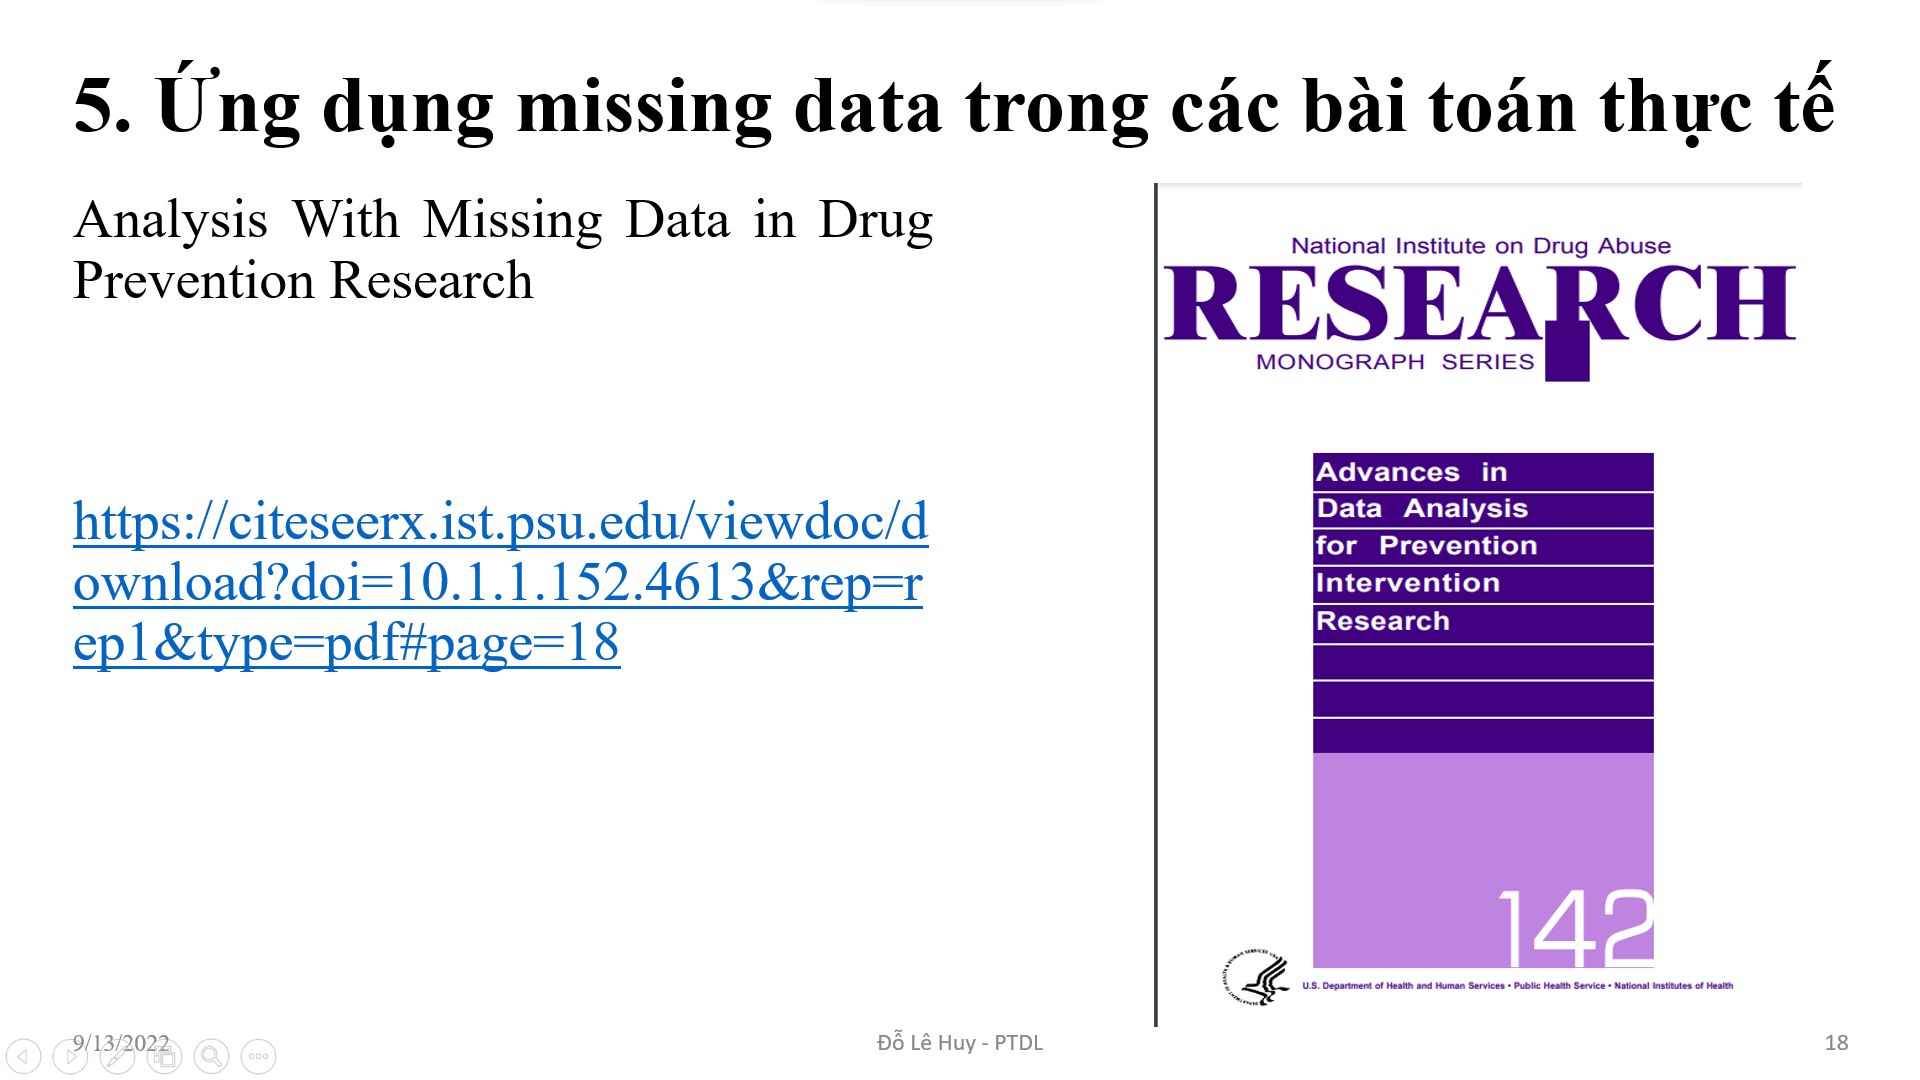